$Question\ 1 - a$

$Linear\ Regression\ with\ one\ variable $

$ Predict:\ motor-UPDRS\ < dependent> using\ PPE\ Feature\ <independent> $


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading the dataset
dataset = pd.read_csv("/content/parkinsons_dataset.csv")
dataset.sample(2)

#Our data set contains 5875 rows and 22 columns




,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
2410,17,66,1,146.340,26.501,31.439,0.00289,0.000013,0.00093,0.00090,...,0.144,0.00542,0.00640,0.00908,0.01627,0.022916,29.201,0.43964,0.56809,0.078081
1622,11,55,0,70.574,21.321,24.761,0.00269,0.000017,0.00124,0.00145,...,0.178,0.00927,0.01032,0.01223,0.02781,0.011534,25.434,0.37658,0.56640,0.131380


$Assigning\ data\ to\ two\ different\ parts:$

$Training\qquad and\qquad Test$

In [17]:
# set the random seed for reprocibility
seed = 1

# Shuffle the DataFrame rows without setting a seed
shuffled_dataset = dataset.sample(frac=1, random_state=seed)


#70% training and 30% testing
split_index = int(0.7 * len(shuffled_dataset))

#spliting data
train_dataset = shuffled_dataset.iloc[: split_index]
test_dataset = shuffled_dataset.iloc[split_index :]

print(f"number of whole dataset rows is: {len(dataset)}")
print(f"number of train rows is: {len(train_dataset)}")
print(f"number of test rows is: {len(test_dataset)}")

number of whole dataset rows is: 5875
number of train rows is: 4112
number of test rows is: 1763


$Introducing\ the\ Dependent\ and\ Independent\ Feature$

$Training\ Set$

In [18]:
# PPE as Independent

ppe_train = train_dataset['PPE']

#Let's take a look at this data length to be sure
print(len(ppe_train))

#Let's take a look at PPE
ppe_train.sample(5)

4112


,PPE
2755,0.25475
5378,0.22101
3259,0.22595
5644,0.27500
4355,0.21231


In [19]:
# motor_UPDRS as dependent

motor_UPDRS_train = train_dataset['motor_UPDRS']

#Let's take a look at this data length to be sure
print(len(motor_UPDRS_train))

#Let's take a look at PPE
#motor_UPDRS_test.describe()
motor_UPDRS_train.sample(5)

4112


,motor_UPDRS
5169,19.982
5572,36.174
1954,10.876
514,15.002
4052,24.081


$Visual\ the\ data\ to\ have\ vison$

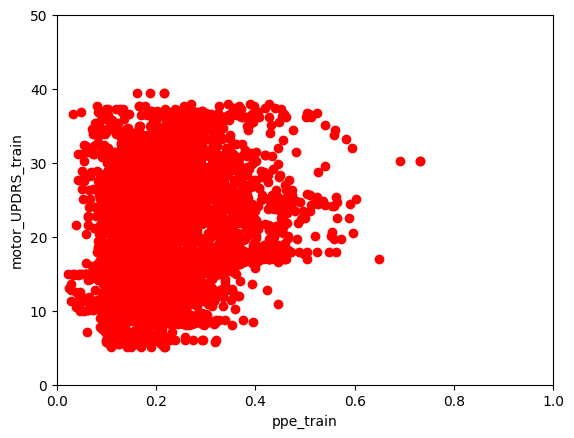

In [20]:
plt.xlim(0,1)
plt.ylim(0,50)
#plt.figure(figsize=(16,8))
plt.scatter(ppe_train, motor_UPDRS_train, color= 'r')
plt.xlabel("ppe_train")
plt.ylabel("motor_UPDRS_train")
plt.show()

$Gradient\ Descent $

$ (Predicted - Y)\ $ $\hat{y} = ax + b $

$  ------------------------ $

$Sum\ of\ Squared\ Residual\ <R^2>\ :$

$R^2 = ∑(Y(Real\ Data)\ - (intercept\ <b> + slope\ <a>*X(Real\ Data)))^2$

$ Loss\ Function = \frac{R^2}{n} $

$ ------------------------ $

$Derivative\ againts\ intercept\ <b> :$

$ d/db\ (L) = \frac{∑(-2 * (Y\ - (b + a*X)))}{n} $

$ ------------------------ $

$Derivative\ againts\ intercept\ <a> :$

$ d/da\ (L) = \frac{∑(-2 * X * (Y\ - (b + a*X)))}{n} $

$ ------------------------ $


$Stepsize = d/db\ L(first\ x) * Learning\ rate (0.1\ Usually) $

$New\ Intercept <b> = old\ Intercept - stepsize$

$ ------------------------ $

$NOTE:\ Gradient\ Descent\ stops\ when\ the\ step\ size\ <slope * Learning\ rate> is\ very\ close\ to\ 0 $

$ ------------------------ $




In [21]:
# Number of Train Data
n_train = train_dataset.shape[0]
print(f"number of Training dataset: {n_train}")

number of Training dataset: 4112


 Iteration 1, slope a = -4.090821713427763, slope b = -18.27347475680937  loss = 146.8330097960382
 Iteration 2, slope a = -3.244945487820084, slope b = -14.439713695189626  loss = 115.44336283884526
 Iteration 3, slope a = -2.576394302101775, slope b = -11.409731090519083  loss = 95.83593723036404
 Iteration 4, slope a = -2.047990773937165, slope b = -9.01500926436237  loss = 83.58818551018885
 Iteration 5, slope a = -1.6303520143932906, slope b = -7.12236142654535  loss = 75.93759759144586
 Iteration 6, slope a = -1.300255458884573, slope b = -5.626524311864686  loss = 71.15859290083887
 Iteration 7, slope a = -1.0393473128794941, slope b = -4.444303821367545  loss = 68.1733008704461
 Iteration 8, slope a = -0.8331217808320004, slope b = -3.5099480701301  loss = 66.30843798052119
 Iteration 9, slope a = -0.6701143067756714, slope b = -2.771490507336  loss = 65.14344288357437
 Iteration 10, slope a = -0.5412639575661516, slope b = -2.187859726336815  loss = 64.4156151835227
11.7974607

Text(0.5, 1.0, 'train data')

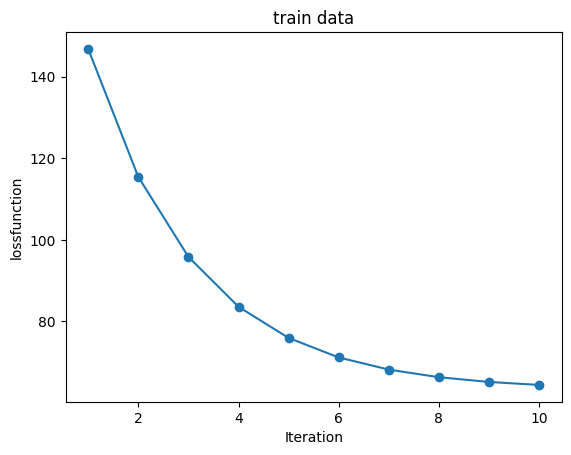

In [22]:
# First b
b = 10
# First a
a = 10
# Iteration
iteration = 10
learning_rate = 0.1
# to store the trend of the derivative agianst a
slope_trend = []

for i in range (iteration):

  lossfunction =  sum (( motor_UPDRS_train - (b + a*ppe_train))**2)/n_train
  # Deravitave a
  derivative_a = sum(-2*ppe_train*(motor_UPDRS_train - (b + a*ppe_train)))/n_train
  # Deravitive b
  derivative_b = sum(-2*(motor_UPDRS_train - (b + a*ppe_train)))/n_train
  slope_trend.append(lossfunction)

  print(f" Iteration {i+1}, slope a = {derivative_a}, slope b = {derivative_b}  loss = {lossfunction}")

  if abs(derivative_a) < 10**-6 or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
    break

  else:
    step_a = derivative_a * learning_rate
    a = a - step_a
    step_b = derivative_b * learning_rate
    b = b - step_b



#derivativeb is slope of (sum squared residual vs intercept)
print(a)
print(b)
#plot the trend of difference between iteration and derivativea
plt.plot(range((i+1) ,0, -1), slope_trend[::-1], marker = "o" )
plt.xlabel('Iteration')
plt.ylabel('lossfunction')
plt.title('train data')

 # After 10 Iteration, The lost function is like above. ---> need more iteration to be plato#

 Iteration 1, slope a = -4.090821713427763, slope b = -18.27347475680937  loss = 146.8330097960382
 Iteration 2, slope a = -3.244945487820084, slope b = -14.439713695189626  loss = 115.44336283884526
 Iteration 3, slope a = -2.576394302101775, slope b = -11.409731090519083  loss = 95.83593723036404
 Iteration 4, slope a = -2.047990773937165, slope b = -9.01500926436237  loss = 83.58818551018885
 Iteration 5, slope a = -1.6303520143932906, slope b = -7.12236142654535  loss = 75.93759759144586
 Iteration 6, slope a = -1.300255458884573, slope b = -5.626524311864686  loss = 71.15859290083887
 Iteration 7, slope a = -1.0393473128794941, slope b = -4.444303821367545  loss = 68.1733008704461
 Iteration 8, slope a = -0.8331217808320004, slope b = -3.5099480701301  loss = 66.30843798052119
 Iteration 9, slope a = -0.6701143067756714, slope b = -2.771490507336  loss = 65.14344288357437
 Iteration 10, slope a = -0.5412639575661516, slope b = -2.187859726336815  loss = 64.4156151835227
 Iteration

Text(0.5, 1.0, 'train data')

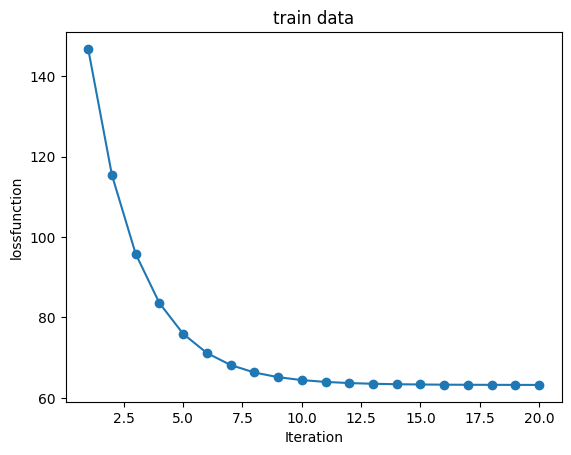

In [23]:
# First b
b = 10
# First a
a = 10
# Iteration
iteration = 20
learning_rate = 0.1
# to store the trend of the derivative agianst a
slope_trend = []

for i in range (iteration):

  lossfunction =  sum (( motor_UPDRS_train - (b + a*ppe_train))**2)/n_train
  # Deravitave a
  derivative_a = sum(-2*ppe_train*(motor_UPDRS_train - (b + a*ppe_train)))/n_train
  # Deravitive b
  derivative_b = sum(-2*(motor_UPDRS_train - (b + a*ppe_train)))/n_train
  slope_trend.append(lossfunction)

  print(f" Iteration {i+1}, slope a = {derivative_a}, slope b = {derivative_b}  loss = {lossfunction}")

  if abs(derivative_a) < 10**-6 or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
    break
  else:
    step_a = derivative_a * learning_rate
    a = a - step_a
    step_b = derivative_b * learning_rate
    b = b - step_b




#derivativeb is slope of (sum squared residual vs intercept)
print(a)
print(b)
#plot the trend of difference between iteration and derivativea
plt.plot(range((i+1) ,0, -1), slope_trend[::-1], marker = "o" )
plt.xlabel('Iteration')
plt.ylabel('lossfunction')
plt.title('train data')

# After 20 Iteration, The lost function is like above. ---> need more iteration to be plato#

 Iteration 1, slope a = -4.090821713427763, slope b = -18.27347475680937  loss = 146.8330097960382
 Iteration 2, slope a = -3.244945487820084, slope b = -14.439713695189626  loss = 115.44336283884526
 Iteration 3, slope a = -2.576394302101775, slope b = -11.409731090519083  loss = 95.83593723036404
 Iteration 4, slope a = -2.047990773937165, slope b = -9.01500926436237  loss = 83.58818551018885
 Iteration 5, slope a = -1.6303520143932906, slope b = -7.12236142654535  loss = 75.93759759144586
 Iteration 6, slope a = -1.300255458884573, slope b = -5.626524311864686  loss = 71.15859290083887
 Iteration 7, slope a = -1.0393473128794941, slope b = -4.444303821367545  loss = 68.1733008704461
 Iteration 8, slope a = -0.8331217808320004, slope b = -3.5099480701301  loss = 66.30843798052119
 Iteration 9, slope a = -0.6701143067756714, slope b = -2.771490507336  loss = 65.14344288357437
 Iteration 10, slope a = -0.5412639575661516, slope b = -2.187859726336815  loss = 64.4156151835227
 Iteration

Text(0.5, 1.0, 'train data')

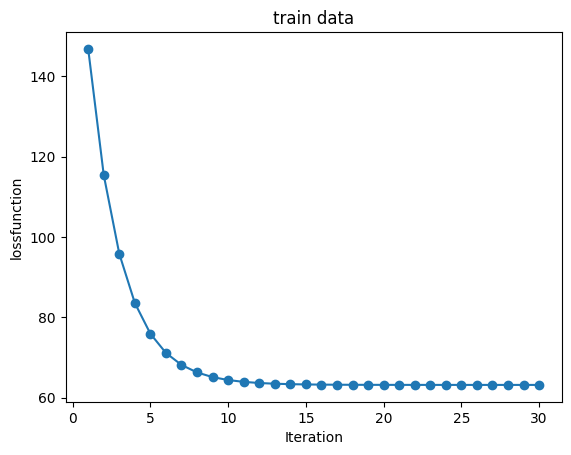

In [24]:
# First b
b = 10
# First a
a = 10
# Iteration
iteration = 30
learning_rate = 0.1
# to store the trend of the derivative agianst a
slope_trend = []

for i in range (iteration):

  lossfunction =  sum (( motor_UPDRS_train - (b + a*ppe_train))**2)/n_train
  # Deravitave a
  derivative_a = sum(-2*ppe_train*(motor_UPDRS_train - (b + a*ppe_train)))/n_train
  # Deravitive b
  derivative_b = sum(-2*(motor_UPDRS_train - (b + a*ppe_train)))/n_train
  slope_trend.append(lossfunction)

  print(f" Iteration {i+1}, slope a = {derivative_a}, slope b = {derivative_b}  loss = {lossfunction}")

  if abs(derivative_a) < 10**-6 or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
    break
  else:
    step_a = derivative_a * learning_rate
    a = a - step_a
    step_b = derivative_b * learning_rate
    b = b - step_b




#derivativeb is slope of (sum squared residual vs intercept)
print(a)
print(b)
#plot the trend of difference between iteration and derivativea
plt.plot(range((i+1) ,0, -1), slope_trend[::-1], marker = "o" )
plt.xlabel('Iteration')
plt.ylabel('lossfunction')
plt.title('train data')

#The Ideal one is b = 12.088 and a = 18.677#

$ Y = 12.088 + 18.677 * X $




#Testing our Model with Test Data

In [25]:
# Number of Test Data
n_test = test_dataset.shape[0]
print(f"number of Training dataset: {n_test}")

number of Training dataset: 1763


In [26]:
ppe_test = test_dataset['PPE']

#Let's take a look at this data length to be sure
print(len(ppe_test))

#Let's take a look at PPE
ppe_test.sample(5)

1763


,PPE
1567,0.16382
4083,0.10910
4237,0.34990
2892,0.28546
5637,0.57598


In [27]:
# motor_UPDRS as dependent

motor_UPDRS_test = test_dataset['motor_UPDRS']

#Let's take a look at this data length to be sure
print(len(motor_UPDRS_test))

#Let's take a look at PPE
#motor_UPDRS_test.describe()
motor_UPDRS_test.sample(5)

1763


,motor_UPDRS
2548,17.607
3515,23.863
1286,17.015
4364,15.699
2681,10.590


#Train and Test Simultaneously for Iteration 25

 Iteration 1, slope a = -4.090821713427763, slope b = -18.27347475680937  loss_train = 146.8330097960382, loss_test = 148.42638058472446
 Iteration 2, slope a = -3.244945487820084, slope b = -14.439713695189626  loss_train = 115.44336283884526, loss_test = 117.51108705614597
 Iteration 3, slope a = -2.576394302101775, slope b = -11.409731090519083  loss_train = 95.83593723036404, loss_test = 98.28400751560194
 Iteration 4, slope a = -2.047990773937165, slope b = -9.01500926436237  loss_train = 83.58818551018885, loss_test = 86.34029279937437
 Iteration 5, slope a = -1.6303520143932906, slope b = -7.12236142654535  loss_train = 75.93759759144586, loss_test = 78.93217387895987
 Iteration 6, slope a = -1.300255458884573, slope b = -5.626524311864686  loss_train = 71.15859290083887, loss_test = 74.34619154799915
 Iteration 7, slope a = -1.0393473128794941, slope b = -4.444303821367545  loss_train = 68.1733008704461, loss_test = 71.51434964948014
 Iteration 8, slope a = -0.8331217808320004,

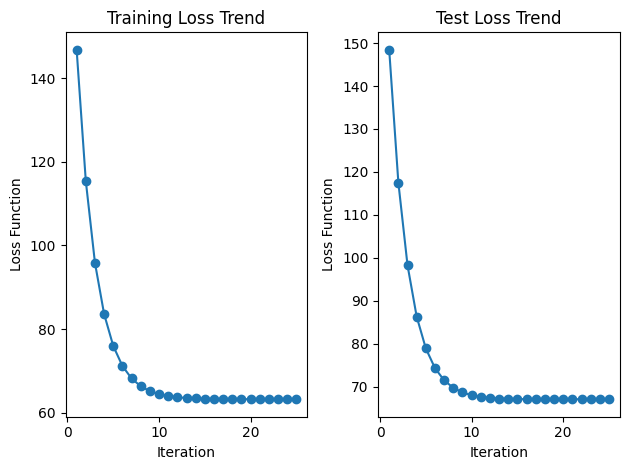

In [28]:
# First b
b = 10
# First a
a = 10
# Iteration
iteration = 25
learning_rate = 0.1
# to store the trend of the derivative agianst a
slope_trend = []
# Store the trend of training losses
loss_train_trend = []
# Store the trend of testing losses
loss_test_trend = []

for i in range (iteration):


  #Loss_test
  loss_test =  sum (( motor_UPDRS_test - (b + a*ppe_test))**2)/n_test
  #Loss_Train
  loss_train = sum (( motor_UPDRS_train - (b + a*ppe_train))**2)/n_train
  # Deravitave a
  derivative_a = sum(-2*ppe_train*(motor_UPDRS_train - (b + a*ppe_train)))/n_train
  # Deravitive b
  derivative_b = sum(-2*(motor_UPDRS_train - (b + a*ppe_train)))/n_train

  slope_trend.append(loss_train)
  loss_train_trend.append(loss_train)
  loss_test_trend.append(loss_test)

  print(f" Iteration {i+1}, slope a = {derivative_a}, slope b = {derivative_b}  loss_train = {loss_train}, loss_test = {loss_test}")

  if abs(derivative_a) < 10**-6 or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
    break
  else:
    step_a = derivative_a * learning_rate
    a = a - step_a
    step_b = derivative_b * learning_rate
    b = b - step_b




#derivativeb is slope of (sum squared residual vs intercept)
print(f"a is: {a}")
print(f"b is: {b}")


# Plot for Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(i + 1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss")
plt.xlabel('Iteration')
plt.ylabel('Loss Function')
plt.title('Training Loss Trend')

# Plot for Test Loss
plt.subplot(1, 2, 2)
plt.plot(range(i + 1, 0, -1), loss_test_trend[::-1], marker="o", label="Test Loss")
plt.xlabel('Iteration')
plt.ylabel('Loss Function')
plt.title('Test Loss Trend')


plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [29]:
 # Independent Feature ppe-test
 # Dependent Feature motor_UPDRS_test

#Number of Training Set
number_set = test_dataset.shape[0]
print(f"Total number Testing data: {number_set}")
print("  ")


# Motor_UPDRS_test
motor_UPDRS_test_bar = np.sum(motor_UPDRS_test) / number_set
print(f"Average motor_UPDRS_test is: {motor_UPDRS_test_bar}")
print("  ")

MSE = (1/number_set) * np.sum( (motor_UPDRS_test - (16.924 + 19.372 * ppe_test))**2 )
print(f"MSE is: {MSE}")
print("  ")

#Sum Squared Regression (SSR):
ssr = np.sum((motor_UPDRS_test - (16.924 + 19.372*ppe_test))**2)
print(f"SSR is: {ssr}")
print("  ")

# Total Sum of Squares (SST):
sst = np.sum( (motor_UPDRS_test - motor_UPDRS_test_bar)**2 )
print(f"SST is: {sst}")

r_squared = 1 - (ssr / sst)
print(f" R^2 is : {r_squared} ")


Total number Testing data: 1763
  
Average motor_UPDRS_test is: 21.228259557572315
  
MSE is: 67.57161968206117
  
SSR is: 119128.76549947384
  
SST is: 120484.62861550646
 R^2 is : 0.011253411589618456 


#R^2 equals 1% which describe that 1% reduction in variation once we took in ppe took into account #
#The greater the R^2, better the model#

$Adjusted\ R^2$

#The adjusted R-squared value will always be lower than the R-squared value when unnecessary variables are added to the model. This makes it a useful metric for comparing models with different numbers of variables, helping to identify whether the additional variables contribute significantly to the explanatory power of the model.

In [30]:
#k = number of parameters in mean value: ------> straight line  ---> 1
k = 1
n = number_set

#p_value = 1 - ( ((1-R_squared)*(n-1)) / (n-k-1) )
#print(f"adjusted r squared: {p_value}")

If R^2 and adjusted R^2 are very close, it suggests that the inclusion of additional predictors in the model has not significantly affected the adjusted
R^2. This could mean that the added predictors are relevant and contribute meaningfully to explaining the variance in the dependent variable. However, it's important to consider other factors, such as the overall fit of the model, the significance of individual predictors, and potential issues like multicollinearity.
In summary, when R^2 and adjusted R^2 are close, it may indicate that the additional predictors in the model are providing meaningful explanatory power without being penalized much by the adjustment for the number of predictors.






$End\ of\ Part\ 1$\
$Part\ 2$

$Question\ 2 $

$Linear\ Regression\ with\ two\ variables $

$ Predict:\ motor-UPDRS\ < dependent> using\ PPE\ and\ NHR\ Features\ <independents> $

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Readinng the dataset
dataset = pd.read_csv("/content/parkinsons_dataset.csv")
dataset.sample(2)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
3071,23,59,1,71.481,14.188,25.835,0.00493,0.000027,0.00269,0.00273,...,0.204,0.0122,0.01438,0.01882,0.03661,0.016745,21.983,0.38560,0.71422,0.22556
2699,20,67,0,60.806,10.949,16.949,0.02040,0.000173,0.01214,0.01131,...,0.570,0.0385,0.03898,0.04229,0.11551,0.031414,19.123,0.50083,0.82148,0.44470


$Assigning\ data\ to\ two\ different\ parts:$

$Training\qquad and\qquad Test$

In [32]:
# set the random seed for reprocibility
seed = 1

# Shuffle the DataFrame rows without setting a seed
shuffled_dataset = dataset.sample(frac=1, random_state=seed)


#70% training and 30% testing
split_index = int(0.7 * len(shuffled_dataset))

#spliting data
train_dataset = shuffled_dataset.iloc[: split_index]
test_dataset = shuffled_dataset.iloc[split_index :]

print(f"number of whole dataset rows is: {len(dataset)}")
print(f"number of train rows is: {len(train_dataset)}")
print(f"number of train rows is: {len(test_dataset)}")

number of whole dataset rows is: 5875
number of train rows is: 4112
number of train rows is: 1763


$Introducing\ the\ Dependent\ and\ Independent\ Features$

$Training\ Set$

In [33]:
# PPE as Independent

ppe_train = train_dataset['PPE']

#Let's take a look at this data length to be sure
print(len(ppe_train))

#Let's take a look at PPE
ppe_train.sample(5)

4112


,PPE
4956,0.469360
1917,0.121860
1751,0.090732
2577,0.290610
2596,0.430450


In [34]:
# NHR as Independent

NHR_train = train_dataset['NHR']

#Let's take a look at this data length to be sure
print(len(NHR_train))

#Let's take a look at PPE
NHR_train.sample(5)

4112


,NHR
1242,0.030520
3012,0.010506
5671,0.019050
5776,0.008689
5329,0.009250


In [35]:
# motor_UPDRS as dependent

motor_UPDRS_train = train_dataset['motor_UPDRS']

#Let's take a look at this data length to be sure
print(len(motor_UPDRS_train))

#motor_UPDRS_test.describe()
motor_UPDRS_train.sample(5)

4112


,motor_UPDRS
5280,27.197
4564,24.986
1293,19.516
321,24.695
2123,15.000


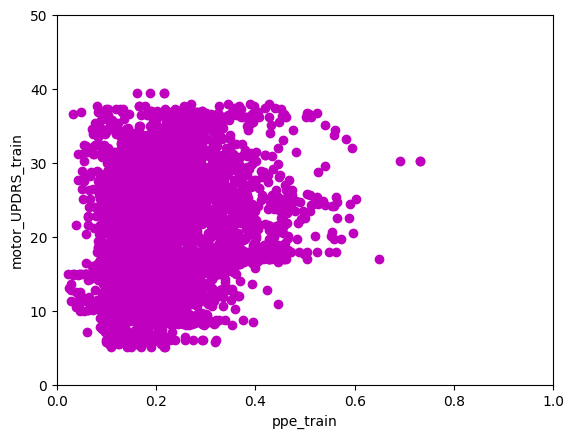

In [36]:
plt.xlim(0,1)
plt.ylim(0,50)
#plt.figure(figsize=(16,8))
plt.scatter(ppe_train, motor_UPDRS_train, color= 'm')
plt.xlabel("ppe_train")
plt.ylabel("motor_UPDRS_train")

plt.show()

In [37]:
import plotly.express as py
py.scatter_3d(x=ppe_train, y = NHR_train, z=  motor_UPDRS_train)

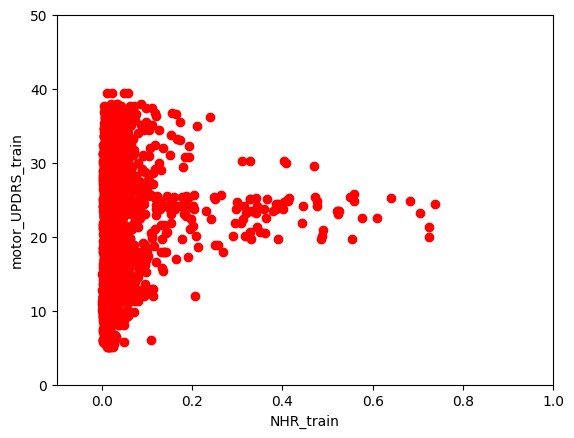

In [38]:
plt.xlim(-.1,1)
plt.ylim(0,50)
#plt.figure(figsize=(16,8))
plt.scatter(NHR_train, motor_UPDRS_train, color= 'r')
plt.xlabel("NHR_train")
plt.ylabel("motor_UPDRS_train")

plt.show()

$Gradient\ Descent $

$ (Predicted - Y)\ $ $\hat{y} = a_1X + a_2X + b $


$ --------------------- $

$Sum\ of\ Squared\ Residual\ <R^2>\ :$


$R^2 = ∑(Y(Real\ Data)\ - (intercept\ <b> + slope1\ <a1>*X(Real\ Data\ ppe) + slope2\ <a2>*X(Real\ Data\ NHR)))^2$

$Loss\ Function = \frac{R^2}{n} $

$ --------------------- $

$Derivative\ againts\ intercept\ <a> :$

$ --------------------- $

$ d/da_1\ (L) = -2 * (X1) * (Y\ - (b + a1*X1 + a2*X2)) $

$ --------------------- $

$ d/da_2\ (L) = -2 * (X2) * (Y\ - (b + a1*X1 + a2*X2)) $

$ --------------------- $

$ d/db\ (L) = -2 * (Y\ - (b + a1*X1 + a2*X2)) $

$ ---------------------- $

$New\ Intercept <a> = old\ Intercept - stepsize$

$ ---------------------- $

In [39]:
# Number of Train Data
n_train = train_dataset.shape[0]
print(f"number of Training dataset: {n_train}")

number of Training dataset: 4112


 Iteration 1, slope a1 = -3.8913421982718215, slope a2 = -0.5066463773765578, slope b = -17.63578238813224  loss = 141.31695347215924
 Iteration 2, slope a1 = -3.0746117790758727, slope a2 = -0.38596633950715387, slope b = -13.935060702117706  loss = 112.10017006154915
 Iteration 3, slope a1 = -2.429295925893247, slope a2 = -0.29062324498773345, slope b = -11.011003376117383  loss = 93.85974818779707
 Iteration 4, slope a1 = -1.9194200285039935, slope a2 = -0.2152996449171132, slope b = -8.700612696437968  loss = 82.47194708647217
 Iteration 5, slope a1 = -1.516559429677887, slope a2 = -0.1557940577243223, slope b = -6.87509910514052  loss = 75.36228608702969
 Iteration 6, slope a1 = -1.198254924619016, slope a2 = -0.10878676229907451, slope b = -5.432701970995758  loss = 70.92349860737109
 Iteration 7, slope a1 = -0.9467607978463662, slope a2 = -0.0716547438673435, slope b = -4.293017057556681  loss = 68.15215669557921
 Iteration 8, slope a1 = -0.7480556082348063, slope a2 = -0.042325

Text(0.5, 1.0, 'train data')

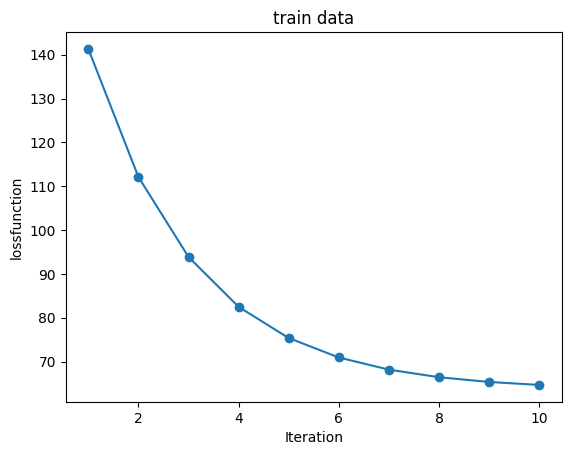

In [40]:
# First b
b = 10
# First a
a_1 = 10
# First a
a_2 = 10
# Iteration
iteration = 10
learning_rate = 0.1
# to store the trend of the derivative agianst a
slope_trend = []

for i in range (iteration):

  lossfunction =  sum (( motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train))**2)/n_train

  # Deravitave a_1
  derivative_a1 = sum(-2*ppe_train * (motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  # Deravitave a_2
  derivative_a2 = sum(-2*NHR_train * (motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  # Deravitive b
  derivative_b = sum(-2*(motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  slope_trend.append(lossfunction)

  print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope b = {derivative_b}  loss = {lossfunction}")

  if abs(derivative_a1) < 10**-6 or abs(derivative_a2) < 10**-6 or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
    break

  else:
    step_a1 = derivative_a1 * learning_rate
    a_1 = a_1 - step_a1

    step_a2 = derivative_a2 * learning_rate
    a_2 = a_2 - step_a2

    step_b = derivative_b * learning_rate
    b = b - step_b



#derivativeb is slope of (sum squared residual vs intercept)
print(a_1)
print(a_2)
print(b)

#plot the trend of difference between iteration and derivativea
plt.plot(range((i+1) ,0, -1), slope_trend[::-1], marker = "o" )
plt.xlabel('Iteration')
plt.ylabel('lossfunction')
plt.title('train data')

# After 10 Iteration, The lost function is like above. ---> need more iteration to be plato#

 Iteration 1, slope a1 = -3.8913421982718215, slope a2 = -0.5066463773765578, slope b = -17.63578238813224  loss = 141.31695347215924
 Iteration 2, slope a1 = -3.0746117790758727, slope a2 = -0.38596633950715387, slope b = -13.935060702117706  loss = 112.10017006154915
 Iteration 3, slope a1 = -2.429295925893247, slope a2 = -0.29062324498773345, slope b = -11.011003376117383  loss = 93.85974818779707
 Iteration 4, slope a1 = -1.9194200285039935, slope a2 = -0.2152996449171132, slope b = -8.700612696437968  loss = 82.47194708647217
 Iteration 5, slope a1 = -1.516559429677887, slope a2 = -0.1557940577243223, slope b = -6.87509910514052  loss = 75.36228608702969
 Iteration 6, slope a1 = -1.198254924619016, slope a2 = -0.10878676229907451, slope b = -5.432701970995758  loss = 70.92349860737109
 Iteration 7, slope a1 = -0.9467607978463662, slope a2 = -0.0716547438673435, slope b = -4.293017057556681  loss = 68.15215669557921
 Iteration 8, slope a1 = -0.7480556082348063, slope a2 = -0.042325

Text(0.5, 1.0, 'train data')

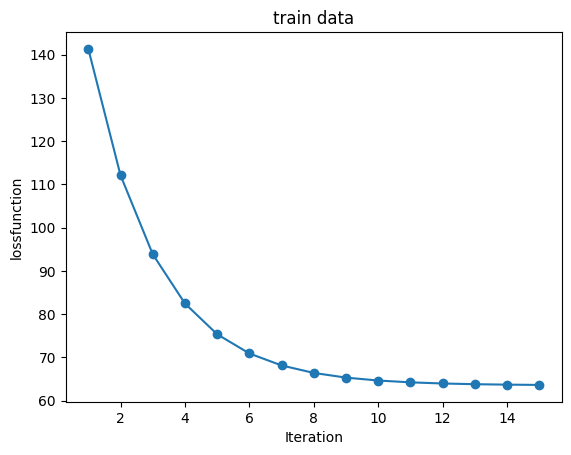

In [41]:
# First b
b = 10
# First a
a_1 = 10
# First a
a_2 = 10
# Iteration
iteration = 15
learning_rate = 0.1
# to store the trend of the derivative agianst a
slope_trend = []

for i in range (iteration):

  lossfunction =  sum (( motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train))**2)/n_train

  # Deravitave a_1
  derivative_a1 = sum(-2*ppe_train * (motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  # Deravitave a_2
  derivative_a2 = sum(-2*NHR_train * (motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  # Deravitive b
  derivative_b = sum(-2*(motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  slope_trend.append(lossfunction)

  print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope b = {derivative_b}  loss = {lossfunction}")

  if abs(derivative_a1) < 10**-6 or abs(derivative_a2) < 10**-6 or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
    break

  else:
    step_a1 = derivative_a1 * learning_rate
    a_1 = a_1 - step_a1

    step_a2 = derivative_a2 * learning_rate
    a_2 = a_2 - step_a2

    step_b = derivative_b * learning_rate
    b = b - step_b



#derivativeb is slope of (sum squared residual vs intercept)
print(a_1)
print(a_2)
print(b)

#plot the trend of difference between iteration and derivativea
plt.plot(range((i+1) ,0, -1), slope_trend[::-1], marker = "o" )
plt.xlabel('Iteration')
plt.ylabel('lossfunction')
plt.title('train data')

# After 15 Iteration, The lost function is like above. ---> need more iteration to be plato#

 Iteration 1, slope a1 = -3.8913421982718215, slope a2 = -0.5066463773765578, slope b = -17.63578238813224  loss = 141.31695347215924
 Iteration 2, slope a1 = -3.0746117790758727, slope a2 = -0.38596633950715387, slope b = -13.935060702117706  loss = 112.10017006154915
 Iteration 3, slope a1 = -2.429295925893247, slope a2 = -0.29062324498773345, slope b = -11.011003376117383  loss = 93.85974818779707
 Iteration 4, slope a1 = -1.9194200285039935, slope a2 = -0.2152996449171132, slope b = -8.700612696437968  loss = 82.47194708647217
 Iteration 5, slope a1 = -1.516559429677887, slope a2 = -0.1557940577243223, slope b = -6.87509910514052  loss = 75.36228608702969
 Iteration 6, slope a1 = -1.198254924619016, slope a2 = -0.10878676229907451, slope b = -5.432701970995758  loss = 70.92349860737109
 Iteration 7, slope a1 = -0.9467607978463662, slope a2 = -0.0716547438673435, slope b = -4.293017057556681  loss = 68.15215669557921
 Iteration 8, slope a1 = -0.7480556082348063, slope a2 = -0.042325

Text(0.5, 1.0, 'train data')

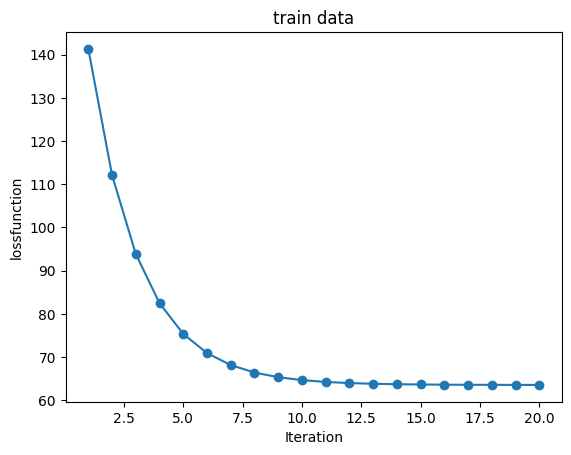

In [42]:
# First b
b = 10
# First a
a_1 = 10
# First a
a_2 = 10
# Iteration
iteration = 20
learning_rate = 0.1
# to store the trend of the derivative agianst a
slope_trend = []

for i in range (iteration):

  lossfunction =  sum (( motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train))**2)/n_train

  # Deravitave a_1
  derivative_a1 = sum(-2*ppe_train * (motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  # Deravitave a_2
  derivative_a2 = sum(-2*NHR_train * (motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  # Deravitive b
  derivative_b = sum(-2*(motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  slope_trend.append(lossfunction)

  print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope b = {derivative_b}  loss = {lossfunction}")

  if abs(derivative_a1) < 10**-6 or abs(derivative_a2) < 10**-6 or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
    break

  else:
    step_a1 = derivative_a1 * learning_rate
    a_1 = a_1 - step_a1

    step_a2 = derivative_a2 * learning_rate
    a_2 = a_2 - step_a2

    step_b = derivative_b * learning_rate
    b = b - step_b



#derivativeb is slope of (sum squared residual vs intercept)
print(f"a_1 is: {a_1}")
print(f"a_2 is: {a_2}")
print(f"b is: {b}")

#plot the trend of difference between iteration and derivativea
plt.plot(range((i+1) ,0, -1), slope_trend[::-1], marker = "o" )
plt.xlabel('Iteration')
plt.ylabel('lossfunction')
plt.title('train data')

 Iteration 1, slope a1 = -3.8913421982718215, slope a2 = -0.5066463773765578, slope b = -17.63578238813224  loss = 141.31695347215924
 Iteration 2, slope a1 = -3.0746117790758727, slope a2 = -0.38596633950715387, slope b = -13.935060702117706  loss = 112.10017006154915
 Iteration 3, slope a1 = -2.429295925893247, slope a2 = -0.29062324498773345, slope b = -11.011003376117383  loss = 93.85974818779707
 Iteration 4, slope a1 = -1.9194200285039935, slope a2 = -0.2152996449171132, slope b = -8.700612696437968  loss = 82.47194708647217
 Iteration 5, slope a1 = -1.516559429677887, slope a2 = -0.1557940577243223, slope b = -6.87509910514052  loss = 75.36228608702969
 Iteration 6, slope a1 = -1.198254924619016, slope a2 = -0.10878676229907451, slope b = -5.432701970995758  loss = 70.92349860737109
 Iteration 7, slope a1 = -0.9467607978463662, slope a2 = -0.0716547438673435, slope b = -4.293017057556681  loss = 68.15215669557921
 Iteration 8, slope a1 = -0.7480556082348063, slope a2 = -0.042325

Text(0.5, 1.0, 'train data')

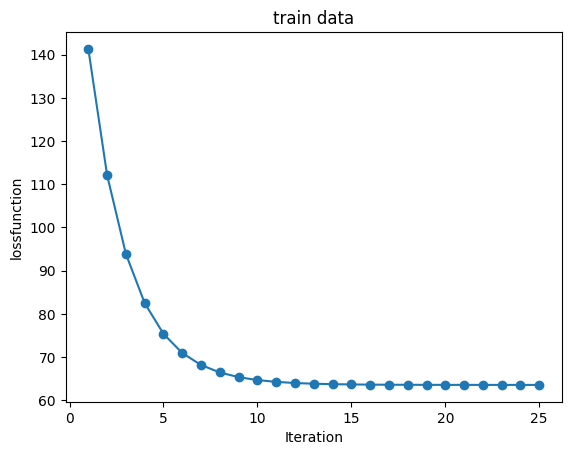

In [43]:
# First b
b = 10
# First a
a_1 = 10
# First a
a_2 = 10
# Iteration
iteration = 25
learning_rate = 0.1
# to store the trend of the derivative agianst a
slope_trend = []

for i in range (iteration):

  lossfunction =  sum (( motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train))**2)/n_train

  # Deravitave a_1
  derivative_a1 = sum(-2*ppe_train * (motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  # Deravitave a_2
  derivative_a2 = sum(-2*NHR_train * (motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  # Deravitive b
  derivative_b = sum(-2*(motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  slope_trend.append(lossfunction)

  print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope b = {derivative_b}  loss = {lossfunction}")

  if abs(derivative_a1) < 10**-6 or abs(derivative_a2) < 10**-6 or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
    break

  else:
    step_a1 = derivative_a1 * learning_rate
    a_1 = a_1 - step_a1

    step_a2 = derivative_a2 * learning_rate
    a_2 = a_2 - step_a2

    step_b = derivative_b * learning_rate
    b = b - step_b



#derivativeb is slope of (sum squared residual vs intercept)
print(f"a_1 is: {a_1}")
print(f"a_2 is: {a_2}")
print(f"b is: {b}")

#plot the trend of difference between iteration and derivativea
plt.plot(range((i+1) ,0, -1), slope_trend[::-1], marker = "o" )
plt.xlabel('Iteration')
plt.ylabel('lossfunction')
plt.title('train data')

# After 25 Iteration, The lost function is like above. ---> no more iteration#

#Y = 18.3310 + 11.837 * X1(PPE) + 10.134 * X2(NHR)

#Testing our Model with Test Data

In [44]:
# Number of Test Data
n_test = test_dataset.shape[0]
print(f"number of Training dataset: {n_test}")

number of Training dataset: 1763


In [45]:
ppe_test = test_dataset['PPE']

#Let's take a look at this data length to be sure
print(len(ppe_test))

#Let's take a look at PPE
ppe_test.sample(5)

1763


,PPE
728,0.17408
2895,0.17043
2830,0.20495
4763,0.26254
690,0.30939


In [46]:
NHR_test = test_dataset['PPE']

#Let's take a look at this data length to be sure
print(len(NHR_test))

#Let's take a look at PPE
NHR_test.sample(5)

1763


,PPE
184,0.19196
2170,0.16817
4163,0.14068
277,0.26714
5521,0.18452


In [47]:
# motor_UPDRS as dependent

motor_UPDRS_test = test_dataset['motor_UPDRS']

#Let's take a look at this data length to be sure
print(len(motor_UPDRS_test))

#Let's take a look at PPE
#motor_UPDRS_test.describe()
motor_UPDRS_test.sample(5)

1763


,motor_UPDRS
3728,12.000
5501,17.482
4000,23.778
3130,12.412
504,18.630


:# Train and Test Simultaneously for Iteration 25

 Iteration 1, slope a1 = -3.8913421982718215, slope a2 = -0.5066463773765578, slope b = -17.63578238813224,  loss_train = 141.31695347215924, loss_test = 113.92849043392188
 Iteration 2, slope a1 = -3.0746117790758727, slope a2 = -0.38596633950715387, slope b = -13.935060702117706,  loss_train = 112.10017006154915, loss_test = 92.13464784867165
 Iteration 3, slope a1 = -2.429295925893247, slope a2 = -0.29062324498773345, slope b = -11.011003376117383,  loss_train = 93.85974818779707, loss_test = 79.81675888907536
 Iteration 4, slope a1 = -1.9194200285039935, slope a2 = -0.2152996449171132, slope b = -8.700612696437968,  loss_train = 82.47194708647217, loss_test = 73.1432816169861
 Iteration 5, slope a1 = -1.516559429677887, slope a2 = -0.1557940577243223, slope b = -6.87509910514052,  loss_train = 75.36228608702969, loss_test = 69.77927020499435
 Iteration 6, slope a1 = -1.198254924619016, slope a2 = -0.10878676229907451, slope b = -5.432701970995758,  loss_train = 70.92349860737109, l

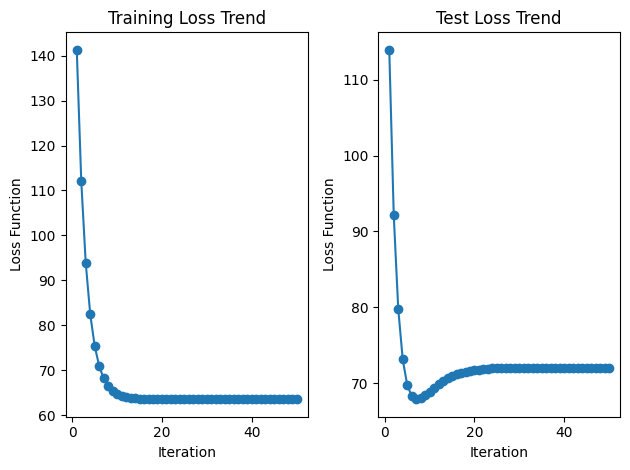

In [48]:
# First b
b = 10
# First a
a_1 = 10
# First a
a_2 = 10
# Iteration
iteration = 50
learning_rate = 0.1
# to store the trend of the derivative agianst a
slope_trend = []
# Store the trend of training losses
loss_train_trend = []
# Store the trend of testing losses
loss_test_trend = []

for i in range (iteration):


  # loss test
  loss_test =  sum (( motor_UPDRS_test - (b + a_1*ppe_test + a_2*NHR_test))**2)/n_test

  # loss_train
  loss_train =  sum (( motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train))**2)/n_train

  # Deravitave a_1
  derivative_a1 = sum(-2*ppe_train * (motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  # Deravitave a_2
  derivative_a2 = sum(-2*NHR_train * (motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  # Deravitive b
  derivative_b = sum(-2*(motor_UPDRS_train - (b + a_1*ppe_train + a_2*NHR_train)))/n_train

  slope_trend.append(loss_train)
  loss_train_trend.append(loss_train)
  loss_test_trend.append(loss_test)

  print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope b = {derivative_b},  loss_train = {loss_train}, loss_test = {loss_test}")

  if abs(derivative_a1) < 10**-6 or abs(derivative_a2) < 10**-6 or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
    break

  else:
    step_a1 = derivative_a1 * learning_rate
    a_1 = a_1 - step_a1

    step_a2 = derivative_a2 * learning_rate
    a_2 = a_2 - step_a2

    step_b = derivative_b * learning_rate
    b = b - step_b



#derivativeb is slope of (sum squared residual vs intercept)
print(f"a_1 is: {a_1}")
print(f"a_2 is: {a_2}")
print(f"b is: {b}")

# Plot for Training Loss
plt.subplot(1, 2, 1)
#plt.figure(figsize = (16,8))
plt.plot(range(i + 1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss")
plt.xlabel('Iteration')
plt.ylabel('Loss Function')
plt.title('Training Loss Trend')

# Plot for Test Loss
plt.subplot(1, 2, 2)
#plt.figure(figsize = (16,8))
plt.plot(range(i + 1, 0, -1), loss_test_trend[::-1], marker="o", label="Test Loss")
plt.xlabel('Iteration')
plt.ylabel('Loss Function')
plt.title('Test Loss Trend')


plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# Converge in 25 iteration which in Comparison to Q1, 5 steps easier.
# Loss function with 2 features is 20.33 which in Comparison to Q1 with Loss Function = 67.11, which should said NHR works pretty well in our model.

In [49]:
# Independent Feature ppe-test
# Indepenedent Feature NHR
 # Dependent Feature motor_UPDRS_test

 #Number of Training Set
number_set = test_dataset.shape[0]
print(f"Total number Testing data: {number_set}")
print("  ")

# Motor_UPDRS_test
motor_UPDRS_test_bar = np.sum(motor_UPDRS_test) / number_set
print(f"Average motor_UPDRS_test is: {motor_UPDRS_test_bar}")
print("  ")

MSE = (1/number_set) * np.sum( (motor_UPDRS_test - (16.7349 + 11.3146 * ppe_test + 9.6116 * NHR_test))**2 )
print(f"MSE is: {MSE}")
print("  ")

#Sum Squared Regression (SSR):
ssr = np.sum((motor_UPDRS_test - (16.7349 + 11.3146 * ppe_test + 9.6116 * NHR_test))**2)
print(f"SSR is: {ssr}")
print("  ")

# Total Sum of Squares (SST):
sst = np.sum( (motor_UPDRS_test - motor_UPDRS_test_bar)**2 )
print(f"SST is: {sst}")
print("  ")

r_squared = 1 - (ssr / sst)
print(f"R^2 is : {r_squared} ")

Total number Testing data: 1763
  
Average motor_UPDRS_test is: 21.228259557572315
  
MSE is: 67.80438953614309
  
SSR is: 119539.13875222027
  
SST is: 120484.62861550646
  
R^2 is : 0.00784738994634293 


$End\ of\ part\ 2$

$Part\ 3$

$Forward \ Stepwise\ Linear\ Regression\  $

$ Predict:\ motor-UPDRS\ < dependent> using\ RPDE\ ,\ Shimmer: APQ5\ , \ DFA\ , \ HNR \ , \ Shimmer(dB)\  Features\ <independents> $

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading the dataset
dataset = pd.read_csv("/content/parkinsons_dataset.csv")
dataset.sample(2)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
2871,21,73,0,39.713,26.7840,38.5690,0.00340,0.000029,0.00166,0.00219,...,0.438,0.02556,0.03197,0.04848,0.07667,0.011843,21.012,0.60166,0.67650,0.17840
3009,22,57,1,75.863,7.8317,8.1644,0.00251,0.000010,0.00118,0.00145,...,0.141,0.00608,0.00705,0.00954,0.01823,0.010015,31.355,0.42527,0.60546,0.16918



$Assigning\ data\ to\ two\ different\ parts:$

$Training\qquad and\qquad Test$
#This is formatted as code

In [51]:
# set the random seed for reprocibility
seed = 1

# Shuffle the DataFrame rows without setting a seed
shuffled_dataset = dataset.sample(frac=1, random_state=seed)


#70% training and 30% testing
split_index = int(0.7 * len(shuffled_dataset))

#spliting data
train_dataset = shuffled_dataset.iloc[: split_index]
test_dataset = shuffled_dataset.iloc[split_index :]

print(f"number of whole dataset rows is: {len(dataset)}")
print(f"number of train rows is: {len(train_dataset)}")
print(f"number of train rows is: {len(test_dataset)}")

number of whole dataset rows is: 5875
number of train rows is: 4112
number of train rows is: 1763


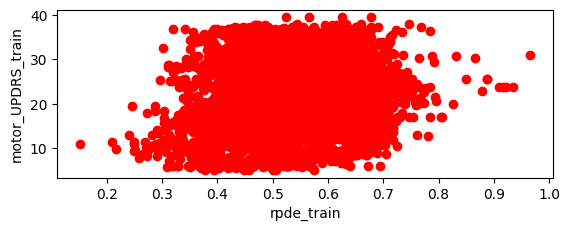

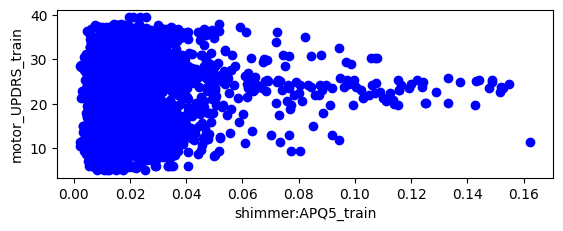

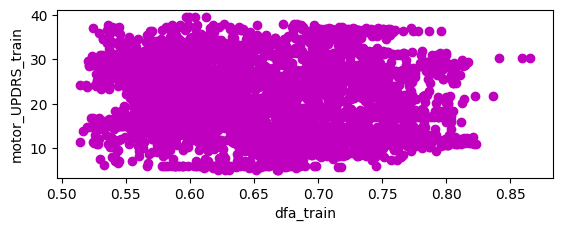

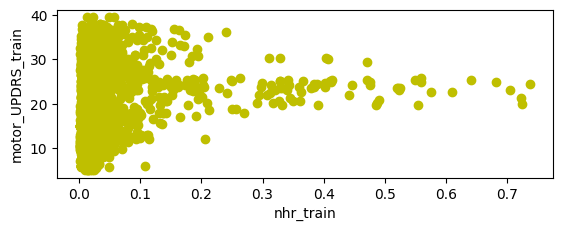

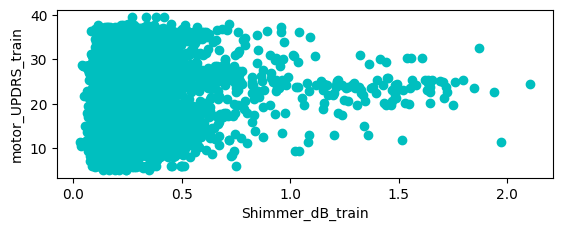

In [53]:
#1
motor_UPDRS_train = train_dataset ['motor_UPDRS']
motor_UPDRS_test = test_dataset ['motor_UPDRS']
#2
rpde_train = train_dataset['RPDE']
rpde_test = test_dataset['RPDE']
#3
shimmer_APQ5_train = train_dataset['Shimmer:APQ5']
shimmer_APQ5_test = test_dataset['Shimmer:APQ5']
#4
dfa_train = train_dataset['DFA']
dfa_test = test_dataset['DFA']
#5
nhr_train = train_dataset['NHR']
nhr_test = test_dataset['NHR']
#6
Shimmer_dB_train = train_dataset['Shimmer(dB)']
Shimmer_dB_test = test_dataset['Shimmer(dB)']

#7
test_time_train = train_dataset['test_time']
test_time_test = test_dataset['test_time']


#8

age_train = train_dataset['age']
age_test = test_dataset['age']

#9
shimmer_APQ11_train = train_dataset['Shimmer:APQ11']
shimmer_APQ11_test = test_dataset['Shimmer:APQ11']
#10
ppe_train = train_dataset['PPE']
ppe_test = test_dataset['PPE']
#11
shimmer_train = train_dataset['Shimmer']
shimmer_test = test_dataset['Shimmer']

# Plot for rpde_train
plt.subplot(2, 1, 1)
plt.scatter(rpde_train	, motor_UPDRS_train, color= 'r')
plt.xlabel("rpde_train")
plt.ylabel("motor_UPDRS_train")

plt.show()

# Plot for Train shimmer_APQ5_train
plt.subplot(2, 1, 1)
plt.scatter(shimmer_APQ5_train	, motor_UPDRS_train, color= 'b')
plt.xlabel("shimmer:APQ5_train")
plt.ylabel("motor_UPDRS_train")

plt.show()

# Plot for Train DFA_train
plt.subplot(2, 1, 1)
plt.scatter(dfa_train	, motor_UPDRS_train, color= 'm')
plt.xlabel("dfa_train")
plt.ylabel("motor_UPDRS_train")

plt.show()

# Plot for Train DFA_train
plt.subplot(2, 1, 1)
plt.scatter(nhr_train	, motor_UPDRS_train, color= 'y')
plt.xlabel("nhr_train")
plt.ylabel("motor_UPDRS_train")

plt.show()

# Plot for Train DFA_train
plt.subplot(2, 1, 1)
plt.scatter(Shimmer_dB_train	, motor_UPDRS_train, color= 'c')
plt.xlabel("Shimmer_dB_train")
plt.ylabel("motor_UPDRS_train")

plt.show()

In [54]:
# Number of Train and Test Data
n_train = train_dataset.shape[0]
n_test = test_dataset.shape[0]
print(f"number of Training dataset: {n_train}")
print(f"number of Test dataset: {n_test}")

number of Training dataset: 4112
number of Test dataset: 1763


#Function for Training Part

In [56]:

def gradient_descent(b, a1, X1, X1_t, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*X1_t ))**2)/n_test
    loss_train =  sum (( motor_UPDRS_train - (b + a1*X1 ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*X1 * (motor_UPDRS_train - (b + a1*X1)))/n_train

    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b + a1*X1)))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

In [57]:
def MSE(b, a1, X1_t ):
  # Motor_UPDRS_test:
  #Mean Square Error:
  MSE = (1/n_test) * np.sum( (motor_UPDRS_test - (b + a1 * X1_t))**2 )
  print(f"MSE is: {MSE}")
  print("  ")

 Iteration 1, slope a1 = -6.418933413919239, slope b = -11.825223686770379, loss-train = 98.85979238341685, loss-test = 101.24119984670446
 Iteration 2, slope a1 = -4.749622593033959, slope b = -8.76529627617215, loss-train = 83.10090629706859, loss-test = 85.81953865972697
 Iteration 3, slope a1 = -3.51277226347394, slope b = -6.498065860166416, loss-train = 74.44934886814077, loss-test = 77.41954930288742
 Iteration 4, slope a1 = -2.5963495194373505, slope b = -4.818176959513225, loss-train = 69.69966663388541, loss-test = 72.85718851722169
 Iteration 5, slope a1 = -1.917344615554828, slope b = -3.5734733311290077, loss-train = 67.09208744983832, loss-test = 70.38889984659492
 Iteration 6, slope a1 = -1.414252248752624, slope b = -2.651216213936203, loss-train = 65.66050838019713, loss-test = 69.06078841112085
 Iteration 7, slope a1 = -1.0415006335875991, slope b = -1.9678728655887692, loss-train = 64.87454548532301, loss-test = 68.3516217399162
 Iteration 8, slope a1 = -0.7653237771

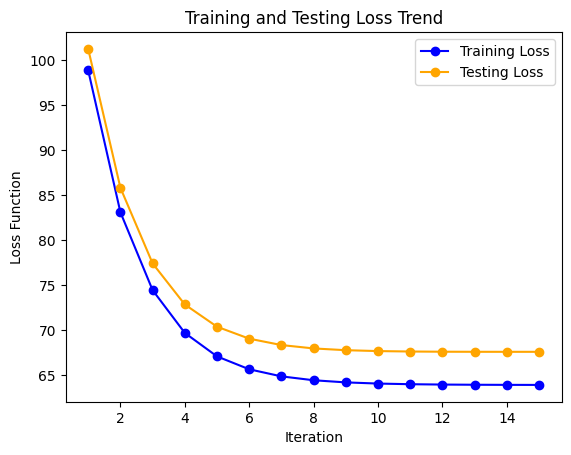

MSE is: 67.60305152691542
  


In [58]:
gradient_descent(b = 10, a1 = 10, X1 = rpde_train, X1_t = rpde_test, iteration = 15, learning_rate = 0.1)
MSE(b = 14.5, a1 = 12.43, X1_t = rpde_test )

$Step\ I-2$

#shimmer_APQ5 va Motor_UPDRS

 Iteration 1, slope a1 = -0.4693069517675097, slope b = -22.24733083657591, loss-train = 188.60162513277314, loss-test = 189.75096864895602
 Iteration 2, slope a1 = -0.379494823479983, slope b = -17.795971442788787, loss-train = 144.03887802418063, loss-test = 145.61685443854662
 Iteration 3, slope a1 = -0.30765220269442056, slope b = -14.235246237965912, loss-train = 115.52450783098715, loss-test = 117.44533143475194
 Iteration 4, slope a1 = -0.2501837253467503, slope b = -11.386955893704387, loss-train = 97.2790090332243, loss-test = 99.47406744290141
 Iteration 5, slope a1 = -0.20421339282003753, slope b = -9.108555451303774, loss-train = 85.60425070980722, loss-test = 88.01866551111148
 Iteration 6, slope a1 = -0.16744064030437697, slope b = -7.286020545841152, loss-train = 78.13391064472387, loss-test = 80.72378736954506
 Iteration 7, slope a1 = -0.1380252031997003, slope b = -5.82814096606354, loss-train = 73.35385076404155, loss-test = 76.08407985294726
 Iteration 8, slope a1 = 

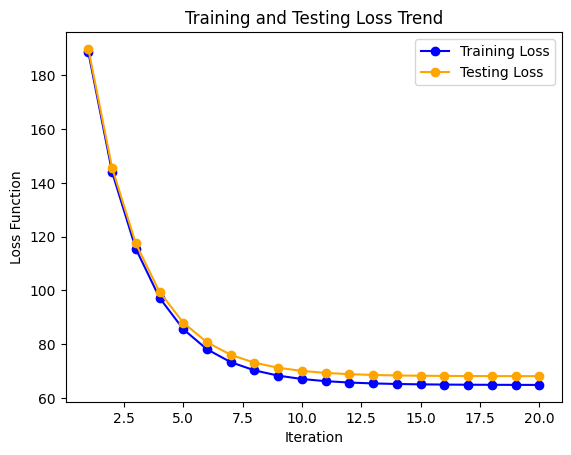

MSE is: 68.1434745298584
  


In [59]:
gradient_descent(b = 10, a1 = 10, X1 = shimmer_APQ5_train, X1_t = shimmer_APQ5_test, iteration = 20, learning_rate = 0.1)
MSE(b = 20.99, a1 = 10.26, X1_t = shimmer_APQ5_test )

$Step\ I-3$

#dfa va Motor_UPDRS

 Iteration 1, slope a1 = -6.034502812338499, slope b = -9.578588424124508, loss-train = 89.7878411874175, loss-test = 92.52913449603497
 Iteration 2, slope a1 = -4.260626920291351, slope b = -6.874031394799488, loss-train = 78.80189803396668, loss-test = 81.79445561069534
 Iteration 3, slope a1 = -2.993665655444566, slope b = -4.94226951378232, loss-train = 73.19522515137484, loss-test = 76.36452416574197
 Iteration 4, slope a1 = -2.0887697906798937, slope b = -3.562479103821846, loss-train = 70.33283153856257, loss-test = 73.62692344907009
 Iteration 5, slope a1 = -1.4424802932449305, slope b = -2.5769361334028953, loss-train = 68.87045618901566, loss-test = 72.25288679519424
 Iteration 6, slope a1 = -0.9809012116715898, slope b = -1.872985698722622, loss-train = 68.12231396782191, loss-test = 71.5673756016829
 Iteration 7, slope a1 = -0.6512521216936706, slope b = -1.3701636674009081, loss-train = 67.73854628962675, loss-test = 71.22804413588554
 Iteration 8, slope a1 = -0.4158344331

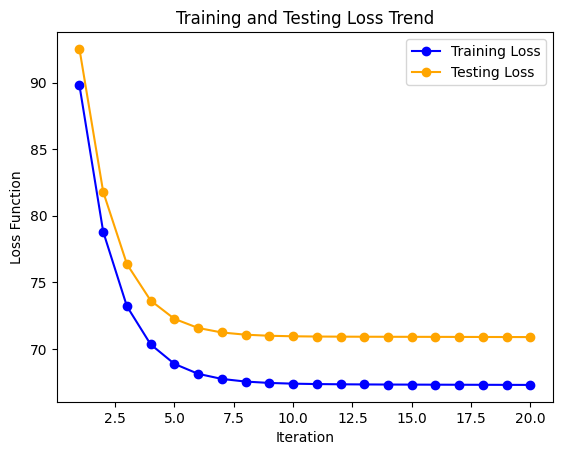

MSE is: 70.87614653829196
  


In [60]:
gradient_descent(b = 10, a1 = 10, X1 = dfa_train, X1_t = dfa_test, iteration = 20, learning_rate = 0.1)
MSE(b = 13.53, a1 = 11.82, X1_t = dfa_test )

$Step\ I-4$

#nhr va Motor_UPDRS

 Iteration 1, slope a1 = -0.7061258925325163, slope b = -22.013047465953328, loss-train = 185.8524484509252, loss-test = 186.85758777590436
 Iteration 2, slope a1 = -0.5651154308474251, slope b = -17.605935061832678, loss-train = 142.20083848337447, loss-test = 143.6681747560133
 Iteration 3, slope a1 = -0.4523355831485552, slope b = -14.081144351489458, loss-train = 114.27805649746267, loss-test = 116.1154090530441
 Iteration 4, slope a1 = -0.3621344667800385, slope b = -11.262030971696964, loss-train = 96.41659030566876, loss-test = 98.55010641650999
 Iteration 5, slope a1 = -0.28999172879867474, slope b = -9.007315473498574, loss-train = 84.9910820649706, loss-test = 87.3616133601472
 Iteration 6, slope a1 = -0.23229200915978399, slope b = -7.2040031236745135, loss-train = 77.68248612445949, loss-test = 80.24267398442264
 Iteration 7, slope a1 = -0.1861437574873171, slope b = -5.761721190524203, loss-train = 73.00737023720295, loss-test = 75.71930416137401
 Iteration 8, slope a1 = -

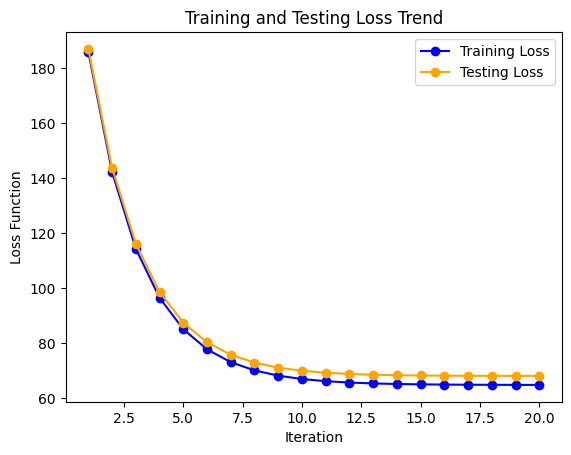

MSE is: 68.0157889785795
  


In [61]:
gradient_descent(b = 10, a1 = 10, X1 = nhr_train, X1_t = nhr_test, iteration = 20, learning_rate = 0.1)
MSE(b = 20.87, a1 = 10.35, X1_t = nhr_test)

$Step\ I-5$

#Shimmer_dB va Motor_UPDRS

 Iteration 1, slope a1 = -4.465306392363823, slope b = -16.426245671206242, loss-train = 133.63845341517754, loss-test = 135.76144750872353
 Iteration 2, slope a1 = -3.3082554350248814, slope b = -12.863053801193239, loss-train = 107.84722521565585, loss-test = 110.29107457821542
 Iteration 3, slope a1 = -2.4078727886099536, slope b = -10.08452087449034, loss-train = 92.14291021948752, loss-test = 94.83408180053466
 Iteration 4, slope a1 = -1.7075805050312074, slope b = -7.917738798402586, loss-train = 82.57022764659557, loss-test = 85.45262507360299
 Iteration 5, slope a1 = -1.1632687514043365, slope b = -6.227902789850631, loss-train = 76.72504257385663, loss-test = 79.75566184041492
 Iteration 6, slope a1 = -0.7405482383222474, slope b = -4.909914636344433, loss-train = 73.1460478221572, loss-test = 76.29179067464368
 Iteration 7, slope a1 = -0.412608124266713, slope b = -3.8818363272038146, loss-train = 70.94501208976489, loss-test = 74.1803226293661
 Iteration 8, slope a1 = -0.158

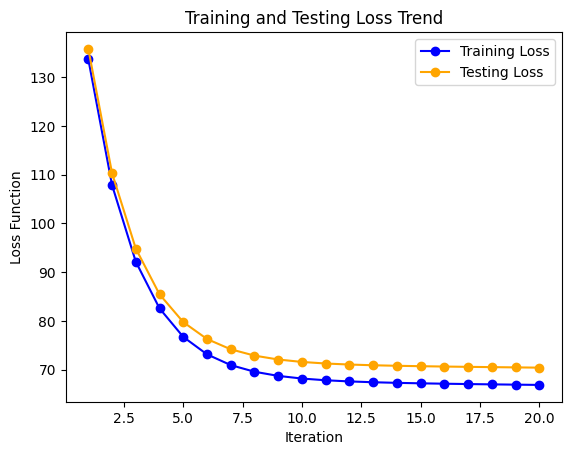

MSE is: 77.64792403825298
  


In [62]:
gradient_descent(b = 10, a1 = 10, X1 = Shimmer_dB_train, X1_t = Shimmer_dB_test, iteration = 20, learning_rate = 0.1)
MSE(b = 17.77, a1 = 10.88, X1_t = nhr_test)

# Based on MSE (The smaller the MSE, the better the model's predictive accuracy), I choose the RPDE

In [63]:
# Function for two Variable
# RPDE is choosen

def gradient_descent(b, a1, a2, X2, X2_t, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*X2_t ))**2)/n_test
    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*X2 ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*X2)))/n_train

    #   Deravitave a_2
    derivative_a2 = sum(-2*X2 * (motor_UPDRS_train - (b + a1*rpde_train + a2*X2)))/n_train

    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b + a1*rpde_train + a2*X2)))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a1 = {derivative_a2}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

In [64]:
# Function for MSE
def MSE(b, a1, a2, X2_t ):
  # Motor_UPDRS_test
  # b, a1, and a2 from final tested model
  MSE = (1/n_test) * np.sum( (motor_UPDRS_test - (b + a1 * rpde_test + a2 * X2_t))**2 )
  print(f"MSE is: {MSE}")
  print("  ")

$Stepz\ II-1$
# shimmer_APQ5 vs RPDE - Motor_UPDRS

 Iteration 1, slope a1 = -6.1852857663458, slope a1 = -0.23565930419406672, slope b = -11.421814688715973, loss-train = 96.4345940655597, loss-test = 98.90334012124221
 Iteration 2, slope a1 = -4.573261109874125, slope a1 = -0.1750985663667431, slope b = -8.466911970707823, loss-train = 81.74425226193554, loss-test = 84.53599359330633
 Iteration 3, slope a1 = -3.3789958129680726, slope a1 = -0.13023293924802803, slope b = -6.277744093260856, loss-train = 73.68110649384293, loss-test = 76.71370842743363
 Iteration 4, slope a1 = -2.494230396222119, slope a1 = -0.0969951411389139, slope b = -4.655876165844974, loss-train = 69.25542302635229, loss-test = 72.46731265126026
 Iteration 5, slope a1 = -1.8387600777186974, slope a1 = -0.07237189834494585, slope b = -3.454296331241085, loss-train = 66.82622986852157, loss-test = 70.17139400588567
 Iteration 6, slope a1 = -1.3531645916595416, slope a1 = -0.05413080627103519, slope b = -2.5640898411090376, loss-train = 65.49284846006347, loss-test 

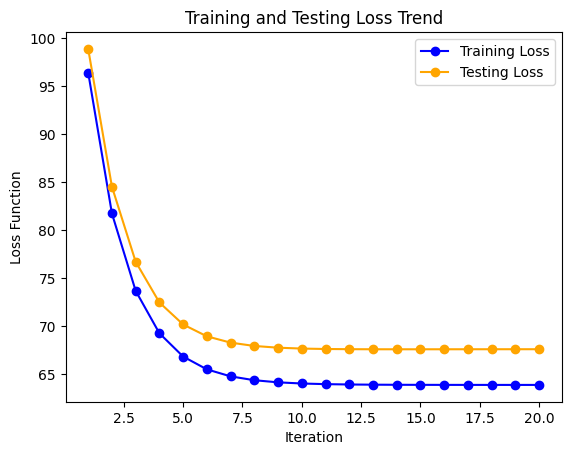

MSE is: 67.59117316342362
  


In [65]:
gradient_descent(b=10, a1 = 10, a2 = 10 , X2 = shimmer_APQ5_train, X2_t = shimmer_APQ5_test, iteration = 20, learning_rate = 0.1)
MSE(b=14.42, a1=12.325, a2=10.094, X2_t = shimmer_APQ5_test )

$Stepz\ II-2$
# DFA vs RPDE - Motor_UPDRS

 Iteration 1, slope a1 = 0.6849107309970838, slope a1 = 1.0693413325778203, slope b = 1.2469277237354073, loss-train = 66.3227750936333, loss-test = 70.32370057907542
 Iteration 2, slope a1 = 0.4324350219373877, slope a1 = 0.7652298891249979, slope b = 0.7836111391161152, loss-train = 66.05982508695548, loss-test = 70.01337874610637
 Iteration 3, slope a1 = 0.26702651238045305, slope a1 = 0.5659131093101387, slope b = 0.480043578419195, loss-train = 65.94425928767056, loss-test = 69.86662240677022
 Iteration 4, slope a1 = 0.15866835600147375, slope a1 = 0.43526260382472, slope b = 0.2811508460176196, loss-train = 65.89197644906054, loss-test = 69.79377371579098
 Iteration 5, slope a1 = 0.08769214865414303, slope a1 = 0.34960540723534567, slope b = 0.15084582170833305, loss-train = 65.86686797210938, loss-test = 69.75507127371247
 Iteration 6, slope a1 = 0.041210256613636656, slope a1 = 0.2934299148568646, slope b = 0.06548258148058542, loss-train = 65.85343074259579, loss-test = 69.732

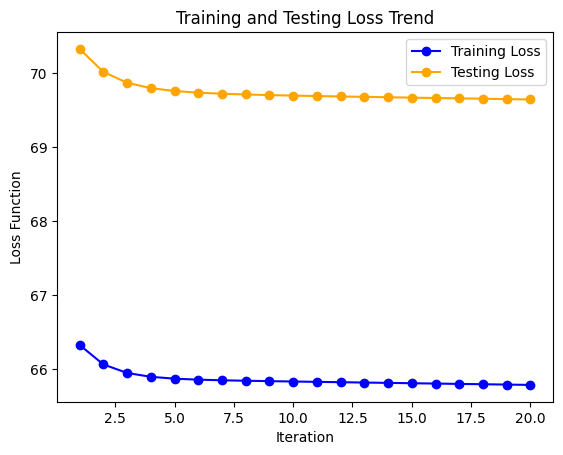

MSE is: 69.63535611060516
  


In [66]:
gradient_descent(b=10, a1 = 10, a2 = 10 , X2 = dfa_train, X2_t = dfa_test, iteration = 20, learning_rate = 0.1)
MSE(b=9.803, a1=9.881, a2=9.371, X2_t = dfa_test )

$Stepz\ II-3$
#NHR vs RPDE - Motor_UPDRS

 Iteration 1, slope a1 = -6.0245256646859975, slope a1 = -0.31171814329924674, slope b = -11.187531318093406, loss-train = 95.29301840031073, loss-test = 97.75023376437987
 Iteration 2, slope a1 = -4.446931183436636, slope a1 = -0.21633462145441643, slope b = -8.295851253000572, loss-train = 81.23196255770735, loss-test = 84.03275082521736
 Iteration 3, slope a1 = -3.2783991399107935, slope a1 = -0.14569904503841305, slope b = -6.153898199681461, loss-train = 73.5166973159068, loss-test = 76.57354009006029
 Iteration 4, slope a1 = -2.4128693282292897, slope a1 = -0.09339483517386936, slope b = -4.567285819771391, loss-train = 69.28318929406989, loss-test = 72.53051463680224
 Iteration 5, slope a1 = -1.7717804293906247, slope a1 = -0.054669079191883165, slope b = -3.392027525326249, loss-train = 66.96002427253966, loss-test = 70.34885378542336
 Iteration 6, slope a1 = -1.2969402044719551, slope a1 = -0.026001181585085437, slope b = -2.5214690232266617, loss-train = 65.68501165279807, lo

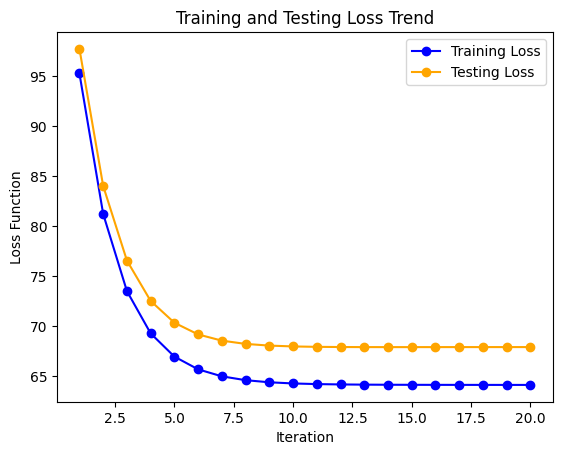

MSE is: 67.91235695803387
  


In [67]:
gradient_descent(b=10, a1 = 10, a2 = 10 , X2 = nhr_train, X2_t = nhr_test, iteration = 20, learning_rate = 0.1)
MSE(b=14.359, a1=12.222, a2=10.030, X2_t = nhr_test )

$Stepz\ II-4$
#Shimmer(dB) vs RPDE - Motor_UPDRS

 Iteration 1, slope a1 = -2.828706493880347, slope a1 = -0.8750794723249019, slope b = -5.600729523346334, loss-train = 75.03721507261922, loss-test = 78.38899118986954
 Iteration 2, slope a1 = -2.019481477817756, slope a1 = -0.3985273928954416, slope b = -4.119892269726272, loss-train = 71.57365599839888, loss-test = 75.07445109184822
 Iteration 3, slope a1 = -1.4367360137321654, slope a1 = -0.05756793492334996, slope b = -3.0524882079863875, loss-train = 69.7381075696458, loss-test = 73.3464061801373
 Iteration 4, slope a1 = -1.0171146610567605, slope a1 = 0.18575140135523613, slope b = -2.2828731644711056, loss-train = 68.7478933669401, loss-test = 72.43376524650941
 Iteration 5, slope a1 = -0.7149847744040349, slope a1 = 0.35876622313192097, slope b = -1.727752704837773, loss-train = 68.19696142634974, loss-test = 71.93882068468008
 Iteration 6, slope a1 = -0.497478803004966, slope a1 = 0.48116517221818345, slope b = -1.3271327542815525, loss-train = 67.87464549501341, loss-test = 

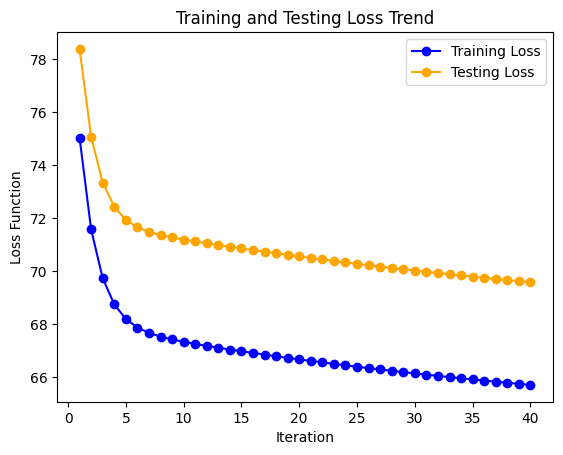

MSE is: 69.54549557143804
  


In [68]:
gradient_descent(b=10, a1 = 10, a2 = 10 , X2 = Shimmer_dB_train, X2_t = Shimmer_dB_test, iteration = 40, learning_rate = 0.1)
MSE(b=12.95, a1=10.808, a2=7.769, X2_t = Shimmer_dB_test )

In [69]:
# Function for three Variable
# shimmer_APQ5 and RPDE is choosen

def gradient_descent(b, a1, a2, a3, X3, X3_t, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Third a
  a3
  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a3*X3_t ))**2)/n_test
    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*X3 ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*X3)))/n_train

    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*X3)))/n_train

    #   Deravitave a_3
    derivative_a3 = sum(-2* X3 * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*X3)))/n_train

    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*X3)))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a3 = {derivative_a3}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      step_a3 = derivative_a3 * learning_rate
      a3 = a3 - step_a3

      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  print(f"a3 is: {a3}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

In [70]:
# Function for MSE
def MSE(b, a1, a2, a3, X3_t ):
  # Motor_UPDRS_test
  # b, a1, a2 and a3 from final tested model
  MSE = (1/n_test) * np.sum( (motor_UPDRS_test - (b + a1 * rpde_test + a2*shimmer_APQ5_test + a3 * X3_t))**2 )
  print(f"MSE is: {MSE}")
  print("  ")

# Base on the MSE, shimmer_APQ5 is choosen

$Stepz\ III-1$
#DFA vs shimmer_APQ5 - RPDE - Motor_UPDRS

 Iteration 1, slope a1 = 0.9185583785705227, slope a2 = 0.031151568550097236, slope a3 = 1.3361522053219839, slope b = 1.6503367217898832, loss-train = 66.56568550321727, loss-test = 70.63374695354509
 Iteration 2, slope a1 = 0.5892192792081454, slope a2 = 0.01877849798895959, slope a3 = 0.9395567484927864, slope b = 1.0460411842471635, loss-train = 66.12182739262073, loss-test = 70.12879089065544
 Iteration 3, slope a1 = 0.37346800850393097, slope a2 = 0.01067256057478005, slope a3 = 0.6796744530804304, slope b = 0.6501508842795637, loss-train = 65.92865572665625, loss-test = 69.89540434321842
 Iteration 4, slope a1 = 0.23213512157334093, slope a2 = 0.005362284462347758, slope a3 = 0.5093614457132798, slope b = 0.3907997401810837, loss-train = 65.84309188560736, loss-test = 69.78334361596032
 Iteration 5, slope a1 = 0.13955829184802593, slope a2 = 0.0018836174145958782, slope a3 = 0.39773085829049143, slope b = 0.2209038357256893, loss-train = 65.80372121579744, loss-test = 69.7264799

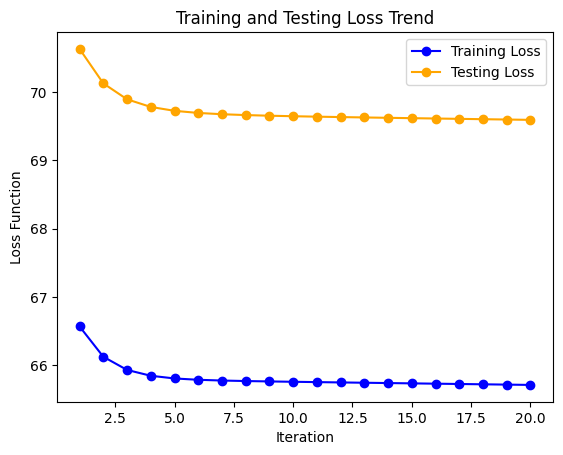

MSE is: 69.58899489246797
  


In [71]:
gradient_descent(b = 10, a1 = 10, a2 = 10, a3 = 10, X3 = dfa_train, X3_t = dfa_test, iteration = 20, learning_rate = 0.1)
MSE(b = 9.6952, a1 = 9.7953, a2 = 9.999, a3 = 9.2963, X3_t = dfa_test )

$Stepz\ III-2$
#NHR vs shimmer_APQ5 - RPDE - Motor_UPDRS

 Iteration 1, slope a1 = -5.790878017112549, slope a2 = -0.20706510885554466, slope a3 = -0.283123947960725, slope b = -10.784122320038893, loss-train = 93.15376203583847, loss-test = 95.70573540423233
 Iteration 2, slope a1 = -4.270749287663811, slope a2 = -0.14992137026189406, slope a3 = -0.1912009618116733, slope b = -7.997764642094756, loss-train = 80.10276028775694, loss-test = 82.983291617519
 Iteration 3, slope a1 = -3.1449171167607846, slope a2 = -0.10760391963762324, slope a3 = -0.12314086701793617, slope b = -5.934056989665196, loss-train = 72.94313061450393, loss-test = 76.06841964138869
 Iteration 4, slope a1 = -2.311116602336586, slope a2 = -0.07626739939693815, slope a3 = -0.0727545467186021, slope b = -4.4055727376146105, loss-train = 69.01519891989126, loss-test = 72.32249292882477
 Iteration 5, slope a1 = -1.6936062887866166, slope a2 = -0.05306378471436265, slope a3 = -0.035458094747339186, slope b = -3.273496269365835, loss-train = 66.86000815271102, loss-test = 70.3

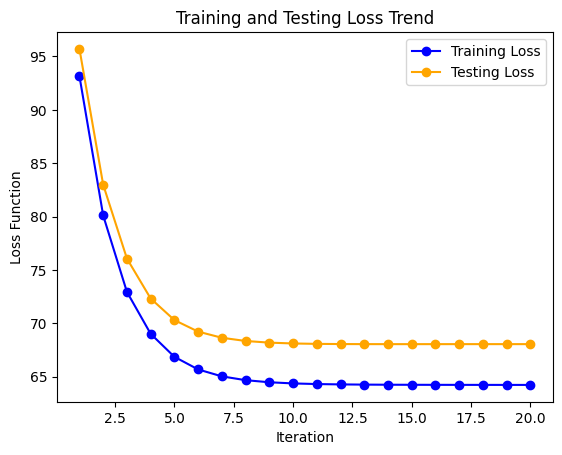

MSE is: 68.04676019045341
  


In [72]:
gradient_descent(b = 10, a1 = 10, a2 = 10, a3 = 10, X3 = nhr_train, X3_t = nhr_test, iteration = 20, learning_rate = 0.1)
MSE(b = 14.2128, a1 = 12.1156, a2 = 10.0584, a3 = 9.9947, X3_t = nhr_test )

$Stepz\ III-3$
#Shimmer(dB) vs shimmer_APQ5 - RPDE - Motor_UPDRS

 Iteration 1, slope a1 = -2.5950588463069177, slope a2 = -0.03442632029328802, slope a3 = -0.6738464884241225, slope b = -5.197320525291843, loss-train = 74.62434659376942, loss-test = 78.02882000439594
 Iteration 2, slope a1 = -1.8508148915509548, slope a2 = -0.0060358426390143905, slope a3 = -0.2367896617285315, slope b = -3.8348454915638706, loss-train = 71.66957720698781, loss-test = 75.20967455255415
 Iteration 3, slope a1 = -1.314945837711194, slope a2 = 0.014235981673652575, slope a3 = 0.07550835725409562, slope b = -2.8527528204930612, loss-train = 70.09241302758939, loss-test = 73.73041876739408
 Iteration 4, slope a1 = -0.9291418115936458, slope a2 = 0.028662682213153302, slope a3 = 0.29798259093317886, slope b = -2.1446100249186215, loss-train = 69.23061767465309, loss-test = 72.93933689759999
 Iteration 5, slope a1 = -0.6514095959302357, slope a2 = 0.03888157793058011, slope a3 = 0.4557920797860977, slope b = -1.6337671599040982, loss-train = 68.74070518887167, loss-test = 

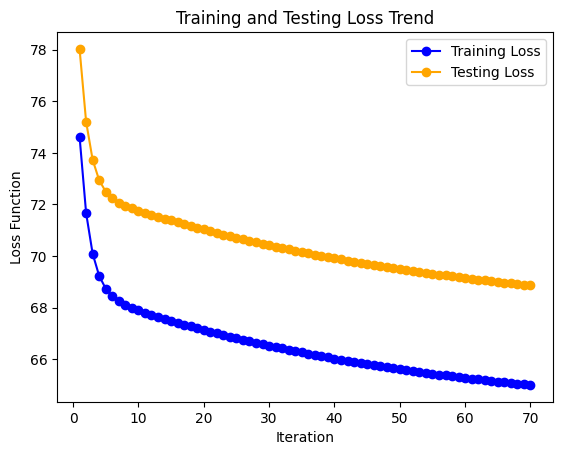

MSE is: 70.26717325481258
  


In [73]:
gradient_descent(b = 10, a1 = 10, a2 = 10, a3 = 10, X3 = Shimmer_dB_train, X3_t = Shimmer_dB_test, iteration = 70, learning_rate = 0.1)
MSE(b = 13.4816, a1 = 10.5729, a2 = 9.6778, a3 = 5.9056, X3_t = nhr_test )

# By comparing MSE from this three variables, NHR is choosen for next round of code

In [74]:
# Function for three Variable
# shimmer_APQ5 and RPDE is choosen

def gradient_descent(b, a1, a2, a3, a4, X4, X4_t, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Third a
  a3
  # Forth a
  a4
  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a3*nhr_test + a4 * X4_t ))**2)/n_test
    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * X4 ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * X4)))/n_train

    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * X4)))/n_train

    #   Deravitave a_3
    derivative_a3 = sum(-2* nhr_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * X4)))/n_train

    #   Deravitave a_4
    derivative_a4 = sum(-2* X4 * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * X4)))/n_train

    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * X4)))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a3 = {derivative_a3}, slope a4 = {derivative_a4}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      step_a3 = derivative_a3 * learning_rate
      a3 = a3 - step_a3

      step_a4 = derivative_a4 * learning_rate
      a4 = a4 - step_a4

      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  print(f"a3 is: {a3}")
  print(f"a4 is: {a4}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

In [75]:
# Function for MSE
def MSE(b, a1, a2, a3, a4, X4_t ):
  # Motor_UPDRS_test
  # b, a1, a2 and a3 from final tested model
  MSE = (1/n_test) * np.sum( (motor_UPDRS_test - (b + a1 * rpde_test + a2*shimmer_APQ5_test + a3 * nhr_test + a4 * X4_t))**2 )
  print(f"MSE is: {MSE}")
  print("  ")


$Step\ IV-1$
#DFA vs NHR - shimmer_APQ5 - RPDE - Motor_UPDRS

 Iteration 1, slope a1 = 1.3129661278037943, slope a2 = 0.05974576388861878, slope a3 = 0.13192100195469353, slope a4 = 1.7511971552373993, slope b = 2.2880290904669267, loss-train = 67.43530297265072, loss-test = 71.67738250518632
 Iteration 2, slope a1 = 0.8606099855998625, slope a2 = 0.042729630276937214, slope a3 = 0.10474801432313618, slope a4 = 1.206714506942555, slope b = 1.4582864986134771, loss-train = 66.60316590086529, loss-test = 70.75436717127995
 Iteration 3, slope a1 = 0.564329495628533, slope a2 = 0.0315805160224981, slope a3 = 0.08693950646548088, slope a4 = 0.8500663615988413, slope b = 0.9148798332224498, loss-train = 66.24355215031427, loss-test = 70.33494749777282
 Iteration 4, slope a1 = 0.37027059443508153, slope a2 = 0.024274003552171616, slope a3 = 0.0752642659164671, slope a4 = 0.6164402287336489, slope b = 0.5590085187822125, loss-train = 66.08663480636017, loss-test = 70.13863641344676
 Iteration 5, slope a1 = 0.2431616261231152, slope a2 = 0.019484202939090

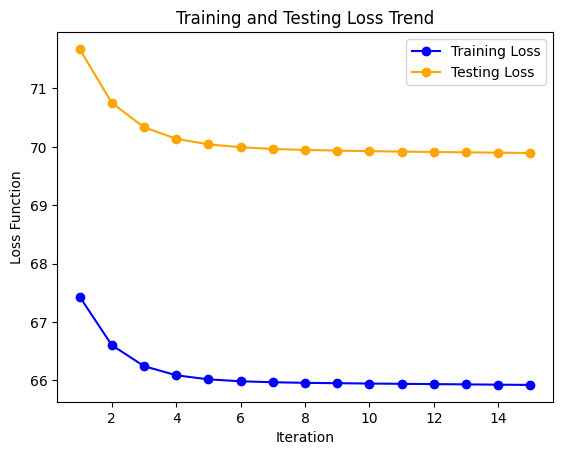

MSE is: 70.27655636998843
  


In [76]:
gradient_descent(b = 10, a1 = 10, a2 =10, a3 =10, a4 = 10, X4 = dfa_train, X4_t = dfa_test, iteration = 15, learning_rate = 0.1)
MSE(b = 9.2844, a1 = 8.6179, a2 = 9.9701, a3 = 9.8976, a4 = 9.2844, X4_t = dfa_test )

$Step\ IV-2$
#Shimmer(dB) vs NHR - shimmer_APQ5 - RPDE - Motor_UPDRS

 Iteration 1, slope a1 = -2.200651097073644, slope a2 = -0.005832124954766523, slope a3 = 0.13423806230192128, slope a4 = -0.2564844781614788, slope b = -4.559628156614775, loss-train = 75.51713466667488, loss-test = 79.06287071177643
 Iteration 2, slope a1 = -1.5649334206979344, slope a2 = 0.018182142130431483, slope a3 = 0.17294543311491192, slope a4 = 0.11352051249169245, slope b = -3.3943383226091246, loss-train = 73.28554971947118, loss-test = 76.95702149330357
 Iteration 3, slope a1 = -1.10739968764691, slope a2 = 0.03525125062044363, slope a3 = 0.20012858776000222, slope a4 = 0.3768052542494939, slope b = -2.554300823827077, loss-train = 72.06080610804067, loss-test = 75.82290558654617
 Iteration 4, slope a1 = -0.7781434772319639, slope a2 = 0.047322624841080387, slope a3 = 0.2190221649300506, slope a4 = 0.5632912700629696, slope b = -1.9484315595609338, loss-train = 71.35928555110962, loss-test = 75.18669029277387
 Iteration 5, slope a1 = -0.5412359949248379, slope a2 = 0.05579

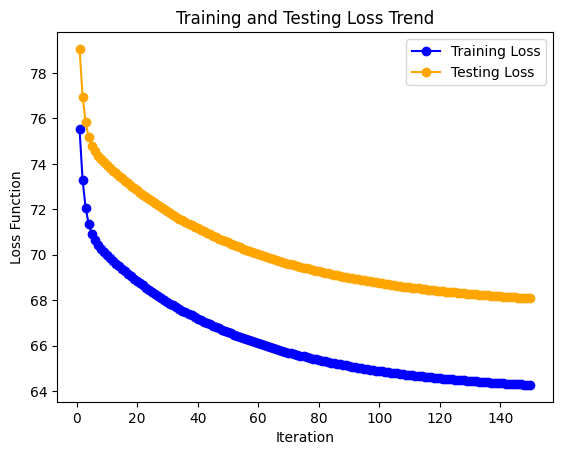

MSE is: 68.06721156329567
  


In [77]:
gradient_descent(b = 10, a1 = 10, a2 =10, a3 =10, a4 = 10, X4 = Shimmer_dB_train, X4_t = Shimmer_dB_test, iteration = 150, learning_rate = 0.1)
MSE(b = 14.7219, a1 = 10.1134, a2 = 9.3701, a3 = 7.6428, a4 = 2.0858, X4_t = Shimmer_dB_test )

$Step\ V-1$
#Shimmer(dB) vs DFA- NHR - shimmer_APQ5 - RPDE - Motor_UPDRS

In [78]:
# Function for four Variable
# DFA, NHR, shimmer_APQ5 and RPDE are choosen

def gradient_descent(b, a1, a2, a3, a4, a5, X5, X5_t, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Third a
  a3
  # Forth a
  a4
  # Fifth a
  a5
  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a3*nhr_test + a4 * dfa_test + a5 * X5_t ))**2)/n_test
    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train + a5 * X5 ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train + a5 * X5)))/n_train

    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + dfa_train + a5 * X5)))/n_train

    #   Deravitave a_3
    derivative_a3 = sum(-2* nhr_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train + a5 * X5)))/n_train

    #   Deravitave a_4
    derivative_a4 = sum(-2* dfa_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train + a5 * X5)))/n_train

    #   Deravitave a_5
    derivative_a5 = sum(-2* X5 * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train + a5 * X5)))/n_train

    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train + a5 * X5)))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a3 = {derivative_a3}, slope a4 = {derivative_a4}, slope a5 = {derivative_a5}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      step_a3 = derivative_a3 * learning_rate
      a3 = a3 - step_a3

      step_a4 = derivative_a4 * learning_rate
      a4 = a4 - step_a4

      step_a5 = derivative_a5 * learning_rate
      a5 = a5 - step_a5

      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  print(f"a3 is: {a3}")
  print(f"a4 is: {a4}")
  print(f"a5 is: {a5}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

In [79]:
# Function for MSE
def MSE(b, a1, a2, a3, a4, a5, X5_t ):
  # Motor_UPDRS_test
  # b, a1, a2, a3, a4 and a5 from final tested model
  MSE = (1/n_test) * np.sum( (motor_UPDRS_test - (b + a1 * rpde_test + a2*shimmer_APQ5_test + a3 * nhr_test + a4 * dfa_train + a5 * X5_t))**2 )
  print(f"MSE is: {MSE}")
  print("  ")

 Iteration 1, slope a1 = 4.903193047842689, slope a2 = 0.02084896231964976, slope a3 = 0.5492830122173393, slope a4 = 5.861648493564266, slope a5 = 3.8539668601653605, slope b = 8.512523253891041, loss-train = 90.90318898675602, loss-test = 95.91729875657606
 Iteration 2, slope a1 = 3.127412322949526, slope a2 = -0.032862893926653106, slope a3 = 0.43474738939467983, slope a4 = 3.7330093646466636, slope a5 = 2.7886226265270833, slope b = 5.269502297014891, loss-train = 78.94887896219475, loss-test = 83.64788579886803
 Iteration 3, slope a1 = 2.0004087205181946, slope a2 = -0.06715909757102685, slope a3 = 0.36129557903179493, slope a4 = 2.382904652574921, slope a5 = 2.1090906637463798, slope b = 3.212841243583698, loss-train = 74.07097321103842, loss-test = 78.56698664390727
 Iteration 4, slope a1 = 1.2850535636961298, slope a2 = -0.08913217686080216, slope a3 = 0.3139194319815085, slope a4 = 1.5267697776791023, slope a5 = 1.674391923363304, slope b = 1.9089082678920335, loss-train = 72.

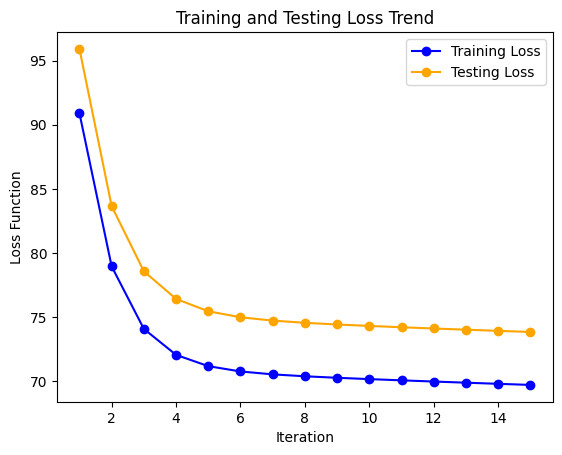

MSE is: 0.0
  


In [80]:
gradient_descent(b = 10, a1 = 10, a2 = 10, a3 = 10, a4 = 10, a5 = 10, X5 = Shimmer_dB_train, X5_t = Shimmer_dB_test, iteration = 15, learning_rate = 0.1)
MSE(b = 8.0962, a1 = 8.6103, a2 = 10.1529, a3 = 9.5751, a4 = 8.3421, a5 = 7.8618, X5_t = Shimmer_dB_test )

# Final Model from Forward step size linear regression:
# Y = 8.096230084760895 + 8.610332162289275 * X(rpde) + 10.152944995345264 * X(shimmer_APQ5) + 9.575147049011013 * X(NHR) + 8.342166327039113 * X(DFA) + 7.861858176505558 * X(shimmer_dB)

$Backward \ Stepwise\ Linear\ Regression\  $

$ Predict:\ motor-UPDRS\ < dependent>\

$ \ using\ ,\ all\ 10\ features \ <independents> $

In [81]:
# Function for four Variable
#rpde - shimmer shimmer_APQ5 - nhr - dfa - Shimmer_dB - shimmer_APQ11 - ppe - shimmer - test_time - age

def gradient_descent(b, a1, a2, a3, a4, a5, a6, a7, a8,a9 ,a10, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Third a
  a3
  # Forth a
  a4
  # Fifth a
  a5
  # 6th a
  a6
   # 7th a
  a7
   # 8th a
  a8
  # 9th a
  a9
  # 10th a
  a10
  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a3*nhr_test + a4 * dfa_test + \
                                           a5 * Shimmer_dB_test +a6 * shimmer_APQ11_test+ a7* ppe_test + a8 * shimmer_test + a9 * test_time_test + a10 * age_test ))**2)/n_test

    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train)))/n_train

    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_3
    derivative_a3 = sum(-2* nhr_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_4
    derivative_a4 = sum(-2* dfa_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train)))/n_train

    # Deravitave a_5
    derivative_a5 = sum(-2* Shimmer_dB_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_6
    derivative_a6 = sum(-2* shimmer_APQ11_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

     #   Deravitave a_7
    derivative_a7 = sum(-2* ppe_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_8
    derivative_a8 = sum(-2* shimmer_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_9
    derivative_a9 = sum(-2* test_time_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_10
    derivative_a10 = sum(-2* age_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train
    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train)))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a3 = {derivative_a3}, slope a4 = {derivative_a4}, \
     slope a5 = {derivative_a5}, slope a6 = {derivative_a6}, slope a7 = {derivative_a7}, slope a8 = {derivative_a8}, \
      slope a9 = {derivative_a9}, slope a10 = {derivative_a10}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      step_a3 = derivative_a3 * learning_rate
      a3 = a3 - step_a3

      step_a4 = derivative_a4 * learning_rate
      a4 = a4 - step_a4

      step_a5 = derivative_a5 * learning_rate
      a5 = a5 - step_a5

      step_a6 = derivative_a6 * learning_rate
      a6 = a6 - step_a6

      step_a7 = derivative_a7 * learning_rate
      a7 = a7 - step_a7

      step_a8 = derivative_a8 * learning_rate
      a8 = a8 - step_a8

      step_a9 = derivative_a9 * learning_rate
      a9 = a9 - step_a9

      step_a10 = derivative_a10 * learning_rate
      a10 = a10 - step_a10


      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  print(f"a3 is: {a3}")
  print(f"a4 is: {a4}")
  print(f"a5 is: {a5}")
  print(f"a6 is: {a6}")
  print(f"a7 is: {a7}")
  print(f"a8 is: {a8}")
  print(f"a9 is: {a9}")
  print(f"a10 is: {a10}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

In [82]:
# Function for MSE
def MSE(b, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10 ):
  # Motor_UPDRS_test
  # b, a1, a2, a3, a4 and a5 from final tested model

  MSE = (1/n_test) * np.sum( (motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a3*nhr_test + a4 * dfa_test + \
                              a5 * Shimmer_dB_test +a6 * shimmer_APQ11_test+ a7* ppe_test + a8 * shimmer_test + a9 * test_time_test + a10 * age_test))**2 )
  print(f"MSE is: {MSE}")
  print("  ")

 Iteration 1, slope a1 = 1709.8710886992055, slope a2 = 63.526549134160696, slope a3 = 99.90579360672228, slope a4 = 2068.4054989045085,      slope a5 = 982.3947971704392, slope a6 = 86.88112541008665, slope a7 = 694.8904064274923, slope a8 = 107.39423753168585,       slope a9 = 350177.6281993439, slope a10 = 206954.58910017536, slope b = 3163.332012504863, loss-train = 2796386.5769086443, loss-test = 2817245.739612308
 Iteration 2, slope a1 = -4950677.994947803, slope a2 = -183170.42955106174, slope a3 = -287636.91961773986, slope a4 = -5995850.172453488,      slope a5 = -2834150.6368079027, slope a6 = -250535.86357191787, slope a7 = -2011291.346239594, slope a8 = -309754.7544668288,       slope a9 = -1049248252.9608023, slope a10 = -598770949.7633548, slope b = -9168364.262447355, loss-train = 24561519494525.71, loss-test = 24802789669447.31
 Iteration 3, slope a1 = 14683905911.852829, slope a2 = 543210365.706006, slope a3 = 853038130.1102912, slope a4 = 17785092856.292397,      slop

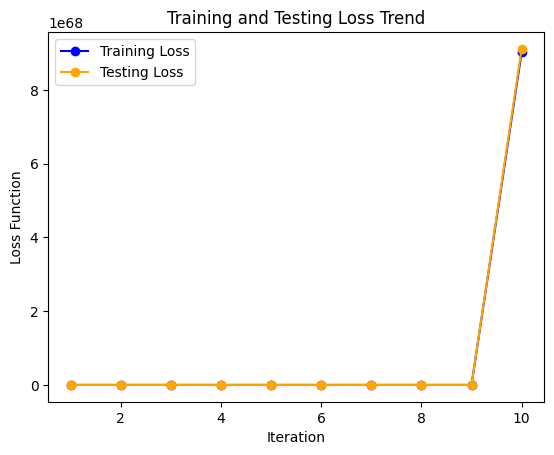

MSE is: 785496.4683756358
  


In [83]:
gradient_descent(b=10, a1=10, a2=10, a3=10, a4=10, a5=10, a6=10, a7=10, a8=10,a9=10 ,a10=10, iteration=10, learning_rate=0.1)
MSE(b=5.5459, a1=2.9945 , a2=1.1077, a3=1.7396, a4=3.6269, a5=1.7140, a6=1.5151, a7=1.2165, a8=1.8733, a9=6.3597, a10=3.6215 )

$Step\ I-1$
# The Mse is too large ----> Look at the age and Test_Time in comparison to other data are way larger, At first step, I eliminate the Test time

In [84]:
# Function for four Variable
#rpde - shimmer shimmer_APQ5 - nhr - dfa - Shimmer_dB - shimmer_APQ11 - ppe - shimmer - test_time - age

def gradient_descent(b, a1, a2, a3, a4, a5, a6, a7, a8, a10 , iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Third a
  a3
  # Forth a
  a4
  # Fifth a
  a5
  # 6th a
  a6
   # 7th a
  a7
  # 8th
  a8

  # 9th a
  #a9

  # 10th a
  a10
  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a3*nhr_test + a4 * dfa_test + \
                                           a5 * Shimmer_dB_test +a6 * shimmer_APQ11_test+ a7* ppe_test + a8 * shimmer_test + a10 * age_test ))**2)/n_test

    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train)))/n_train

    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train

    #   Deravitave a_3
    derivative_a3 = sum(-2* nhr_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train

    #   Deravitave a_4
    derivative_a4 = sum(-2* dfa_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  +a10 * age_train)))/n_train

    # Deravitave a_5
    derivative_a5 = sum(-2* Shimmer_dB_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train

    #   Deravitave a_6
    derivative_a6 = sum(-2* shimmer_APQ11_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train

     #   Deravitave a_7
    derivative_a7 = sum(-2* ppe_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train

    #   Deravitave a_8
    derivative_a8 = sum(-2* shimmer_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  +a10 * age_train )))/n_train

    #   Deravitave a_9
    #derivative_a9 = sum(-2* test_time_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
    #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_10
    derivative_a10 = sum(-2* age_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train
    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train)))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a3 = {derivative_a3}, slope a4 = {derivative_a4}, \
     slope a5 = {derivative_a5}, slope a6 = {derivative_a6}, slope a7 = {derivative_a7}, slope a8 = {derivative_a8}, slope a10 = {derivative_a10}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      step_a3 = derivative_a3 * learning_rate
      a3 = a3 - step_a3

      step_a4 = derivative_a4 * learning_rate
      a4 = a4 - step_a4

      step_a5 = derivative_a5 * learning_rate
      a5 = a5 - step_a5

      step_a6 = derivative_a6 * learning_rate
      a6 = a6 - step_a6

      step_a7 = derivative_a7 * learning_rate
      a7 = a7 - step_a7

      step_a8 = derivative_a8 * learning_rate
      a8 = a8 - step_a8

      #step_a9 = derivative_a9 * learning_rate
      #a9 = a9 - step_a9

      step_a10 = derivative_a10 * learning_rate
      a10 = a10 - step_a10


      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  print(f"a3 is: {a3}")
  print(f"a4 is: {a4}")
  print(f"a5 is: {a5}")
  print(f"a6 is: {a6}")
  print(f"a7 is: {a7}")
  print(f"a8 is: {a8}")
  #print(f"a9 is: {a9}")
  print(f"a10 is: {a10}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

 Iteration 1, slope a1 = 711.5539684026807, slope a2 = 26.814419640789204, slope a3 = 42.196462364916925, slope a4 = 856.0794374173316,      slope a5 = 413.90642735123043, slope a6 = 36.70669322782119, slope a7 = 289.25737133210106, slope a8 = 45.28676690193325, slope a10 = 86563.01115105014, slope b = 1311.0383875535035, loss-train = 437363.4806663288, loss-test = 435364.5138388582
 Iteration 2, slope a1 = -608499.3616862758, slope a2 = -22842.59194423207, slope a3 = -35783.25157807503, slope a4 = -732212.3718168341,      slope a5 = -352778.3988798586, slope a6 = -31301.31828428761, slope a7 = -247137.88213199476, slope a8 = -38592.61120140473, slope a10 = -74111677.99455626, slope b = -1121829.2579632238, loss-train = 320529773915.0099, loss-test = 318917417080.5406
 Iteration 3, slope a1 = 520972511.78854024, slope a2 = 19556989.355935793, slope a3 = 30636469.03981924, slope a4 = 626890466.1350181,      slope a5 = 302035745.25520223, slope a6 = 26799009.018569965, slope a7 = 2115896

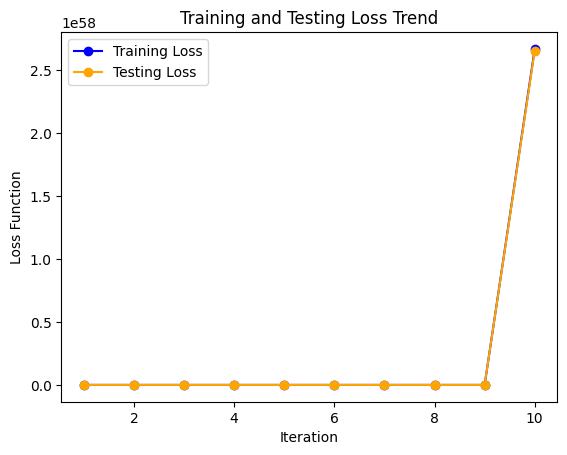

In [85]:
gradient_descent(b=10, a1=10, a2=10, a3=10, a4=10, a5=10, a6=10, a7=10, a8=10, a10=10 , iteration=10, learning_rate=0.1)

$Step\ I-2$
#In this level, the loss function decreased but it is still too high. Now, age will be removed for next step

In [86]:
# Function for four Variable
#rpde - shimmer shimmer_APQ5 - nhr - dfa - Shimmer_dB - shimmer_APQ11 - ppe - shimmer - test_time - age

def gradient_descent(b, a1, a2, a3, a4, a5, a6, a7, a8, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Third a
  a3
  # Forth a
  a4
  # Fifth a
  a5
  # 6th a
  a6
   # 7th a
  a7
   # 8th a
  a8

  # 9th a
  #a9

  # 10th a
  #a10

  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a3*nhr_test + a4 * dfa_test + \
                                           a5 * Shimmer_dB_test +a6 * shimmer_APQ11_test+ a7* ppe_test + a8 * shimmer_test ))**2)/n_test

    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train )))/n_train

    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_3
    derivative_a3 = sum(-2* nhr_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_4
    derivative_a4 = sum(-2* dfa_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    # Deravitave a_5
    derivative_a5 = sum(-2* Shimmer_dB_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_6
    derivative_a6 = sum(-2* shimmer_APQ11_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

     #   Deravitave a_7
    derivative_a7 = sum(-2* ppe_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_8
    derivative_a8 = sum(-2* shimmer_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_9
    #derivative_a9 = sum(-2* test_time_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
    #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_10
    #derivative_a10 = sum(-2* age_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train
    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train )))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a3 = {derivative_a3}, slope a4 = {derivative_a4}, \
     slope a5 = {derivative_a5}, slope a6 = {derivative_a6}, slope a7 = {derivative_a7}, slope a8 = {derivative_a8}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      step_a3 = derivative_a3 * learning_rate
      a3 = a3 - step_a3

      step_a4 = derivative_a4 * learning_rate
      a4 = a4 - step_a4

      step_a5 = derivative_a5 * learning_rate
      a5 = a5 - step_a5

      step_a6 = derivative_a6 * learning_rate
      a6 = a6 - step_a6

      step_a7 = derivative_a7 * learning_rate
      a7 = a7 - step_a7

      step_a8 = derivative_a8 * learning_rate
      a8 = a8 - step_a8

      #step_a9 = derivative_a9 * learning_rate
      #a9 = a9 - step_a9

      #step_a10 = derivative_a10 * learning_rate
      #a10 = a10 - step_a10


      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  print(f"a3 is: {a3}")
  print(f"a4 is: {a4}")
  print(f"a5 is: {a5}")
  print(f"a6 is: {a6}")
  print(f"a7 is: {a7}")
  print(f"a8 is: {a8}")
  #print(f"a9 is: {a9}")
  #print(f"a10 is: {a10}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

 Iteration 1, slope a1 = 8.08664335404323, slope a2 = 0.4070685707502439, slope a3 = 0.8296662462398836, slope a4 = 9.590306143011743,      slope a5 = 6.073684160569082, slope a6 = 0.5204716811285027, slope a7 = 3.5499046784038675, slope a8 = 0.6714429719722276, slope b = 14.12204514105058, loss-train = 128.89444765257065, loss-test = 135.35595990177492
 Iteration 2, slope a1 = 5.071960401963177, slope a2 = 0.2890875192383246, slope a3 = 0.6341286918778549, slope a4 = 5.9780833542757925,      slope a5 = 4.261384119880717, slope a6 = 0.3604021425448768, slope a7 = 2.309632838214497, slope a8 = 0.4728517749156671, slope b = 8.620735955696878, loss-train = 95.73512157534553, loss-test = 101.52253349033111
 Iteration 3, slope a1 = 3.190268905308119, slope a2 = 0.2150903608731511, slope a3 = 0.5109498794675886, slope a4 = 3.7247024807610654,      slope a5 = 3.125175688274072, slope a6 = 0.26008451354506607, slope a7 = 1.534470613767935, slope a8 = 0.34833588084895695, slope b = 5.1892931405

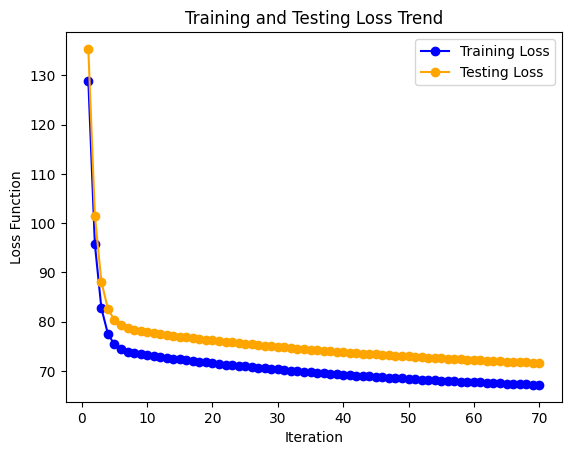

MSE is: 71.54837505252108
  


In [87]:
gradient_descent(b=10, a1=10, a2=10, a3=10, a4=10, a5=10, a6=10, a7=10, a8=10 , iteration=70, learning_rate=0.1)
MSE(b=8.8851, a1=7.5610, a2=9.4391, a3=8.2397, a4=7.1735, a5=2.422, a6=9.4252, a7=7.9182, a8=9.1334, a9=0, a10=0 )

# Removing that two features really was good choice. Now, I will put a1...  a8 zero and check the MSE.
#Any which has highest MSE, will be removed.

In [88]:
MSE(b=8.8851, a1=7.5610, a2=9.4391, a3=8.2397, a4=7.1735, a5=2.422, a6=9.4252, a7=7.9182, a8=9.1334, a9=0, a10=0 )

MSE is: 71.54837505252108
  


#MSE when ai become 0
#[87.534,71.102,70.34,91.847,70.7324,71.199,73.4297,70.9721,]
#MSE of our Model with 8 features is 71.5483.
#The item which by elimination, the mse doesn't change meaningfully, should be removed
#shimmer: APQ11 will be removed. a6

$Step\ I-3$

In [89]:
# Function for four Variable
#rpde - shimmer_APQ5 - nhr - dfa - Shimmer_dB - shimmer_APQ11 - ppe - shimmer - test_time - age

def gradient_descent(b, a1, a2, a3, a4, a5, a7, a8, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Third a
  a3
  # Forth a
  a4
  # Fifth a
  a5
  # 6th a
  #a6
   # 7th a
  a7
   # 8th a
  a8

  # 9th a
  #a9

  # 10th a
  #a10

  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a3*nhr_test + a4 * dfa_test + \
                                           a5 * Shimmer_dB_test + a7* ppe_test + a8 * shimmer_test ))**2)/n_test

    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train )))/n_train

    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_3
    derivative_a3 = sum(-2* nhr_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_4
    derivative_a4 = sum(-2* dfa_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    # Deravitave a_5
    derivative_a5 = sum(-2* Shimmer_dB_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_6
    #derivative_a6 = sum(-2* shimmer_APQ11_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

     #   Deravitave a_7
    derivative_a7 = sum(-2* ppe_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_8
    derivative_a8 = sum(-2* shimmer_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_9
    #derivative_a9 = sum(-2* test_time_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
    #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_10
    #derivative_a10 = sum(-2* age_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train
    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train )))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a3 = {derivative_a3}, slope a4 = {derivative_a4}, \
     slope a5 = {derivative_a5}, slope a7 = {derivative_a7}, slope a8 = {derivative_a8}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      step_a3 = derivative_a3 * learning_rate
      a3 = a3 - step_a3

      step_a4 = derivative_a4 * learning_rate
      a4 = a4 - step_a4

      step_a5 = derivative_a5 * learning_rate
      a5 = a5 - step_a5

      #step_a6 = derivative_a6 * learning_rate
      #a6 = a6 - step_a6

      step_a7 = derivative_a7 * learning_rate
      a7 = a7 - step_a7

      step_a8 = derivative_a8 * learning_rate
      a8 = a8 - step_a8

      #step_a9 = derivative_a9 * learning_rate
      #a9 = a9 - step_a9

      #step_a10 = derivative_a10 * learning_rate
      #a10 = a10 - step_a10


      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  print(f"a3 is: {a3}")
  print(f"a4 is: {a4}")
  print(f"a5 is: {a5}")
  #print(f"a6 is: {a6}")
  print(f"a7 is: {a7}")
  print(f"a8 is: {a8}")
  #print(f"a9 is: {a9}")
  #print(f"a10 is: {a10}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

 Iteration 1, slope a1 = 7.768814387684305, slope a2 = 0.3895826262322469, slope a3 = 0.7950199459551073, slope a4 = 9.224968152801107,      slope a5 = 5.814162669956228, slope a7 = 3.406298381532412, slope a8 = 0.6427975080816651, slope b = 13.571152388132306, loss-train = 123.80704742319466, loss-test = 130.2824281568977
 Iteration 2, slope a1 = 4.873802940786685, slope a2 = 0.2763258702035984, slope a3 = 0.6073645890799727, slope a4 = 5.755996084809129,      slope a5 = 4.074367330130557, slope a7 = 2.2153662507824206, slope a8 = 0.45215281292823944, slope b = 8.287979740350575, loss-train = 93.21747496822739, loss-test = 99.02865381785938
 Iteration 3, slope a1 = 3.0663317607853173, slope a2 = 0.20528019750992266, slope a3 = 0.4891417833922928, slope a4 = 3.5913805042724647,      slope a5 = 2.983427921485027, slope a7 = 1.47086395662804, slope a8 = 0.3325990334786656, slope b = 4.991687086813555, loss-train = 81.18547436653566, loss-test = 86.57845820864806
 Iteration 4, slope a1 = 

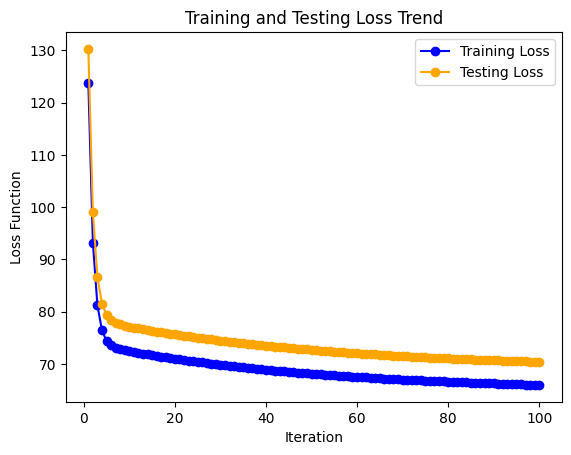

In [90]:

gradient_descent(b=10, a1=10, a2=10, a3=10, a4=10, a5=10, a7=10, a8=10, iteration=100, learning_rate=0.1)

#Backward in comparison to forward converged slowly

In [91]:
#MSE After 3 feature Elimination
MSE(b=9.7007, a1=7.605, a2=9.3529, a3=7.8897, a4=6.905, a5=1.3743, a6=0, a7=7.7811, a8=9.007, a9=0, a10=0 )

MSE is: 70.34114813492732
  


#Comparing when one feature is zero with MSE After 3

In [92]:
MSE(b=9.7007, a1=7.605, a2=9.3529, a3=7.8897, a4=6.905, a5=1.3743, a6=0, a7=7.7811, a8=9.007, a9=0, a10=0 )

MSE is: 70.34114813492732
  


#[86.5, 70.0196,69.4895,88.859, 69.9087, 72.4439, 69.948 ]

\# Comparison between MSE after 3 and next MSE shows
by 0 ing the a3(nhr), the MSE decreased which is awesome

$Step\ I-4$

In [93]:
# Function for four Variable
#rpde - shimmer_APQ5 - nhr - dfa - Shimmer_dB - shimmer_APQ11 - ppe - shimmer - test_time - age

def gradient_descent(b, a1, a2, a4, a5, a7, a8, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Third a
  #a3
  # Forth a
  a4
  # Fifth a
  a5
  # 6th a
  #a6
   # 7th a
  a7
   # 8th a
  a8

  # 9th a
  #a9

  # 10th a
  #a10

  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a4 * dfa_test + \
                                           a5 * Shimmer_dB_test + a7* ppe_test + a8 * shimmer_test ))**2)/n_test

    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train )))/n_train

    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_3
    #derivative_a3 = sum(-2* nhr_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_4
    derivative_a4 = sum(-2* dfa_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    # Deravitave a_5
    derivative_a5 = sum(-2* Shimmer_dB_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_6
    #derivative_a6 = sum(-2* shimmer_APQ11_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

     #   Deravitave a_7
    derivative_a7 = sum(-2* ppe_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_8
    derivative_a8 = sum(-2* shimmer_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_9
    #derivative_a9 = sum(-2* test_time_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
    #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_10
    #derivative_a10 = sum(-2* age_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train
    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train )))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a4 = {derivative_a4}, \
     slope a5 = {derivative_a5}, slope a7 = {derivative_a7}, slope a8 = {derivative_a8}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      #step_a3 = derivative_a3 * learning_rate
      #a3 = a3 - step_a3

      step_a4 = derivative_a4 * learning_rate
      a4 = a4 - step_a4

      step_a5 = derivative_a5 * learning_rate
      a5 = a5 - step_a5

      #step_a6 = derivative_a6 * learning_rate
      #a6 = a6 - step_a6

      step_a7 = derivative_a7 * learning_rate
      a7 = a7 - step_a7

      step_a8 = derivative_a8 * learning_rate
      a8 = a8 - step_a8

      #step_a9 = derivative_a9 * learning_rate
      #a9 = a9 - step_a9

      #step_a10 = derivative_a10 * learning_rate
      #a10 = a10 - step_a10


      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  #print(f"a3 is: {a3}")
  print(f"a4 is: {a4}")
  print(f"a5 is: {a5}")
  #print(f"a6 is: {a6}")
  print(f"a7 is: {a7}")
  print(f"a8 is: {a8}")
  #print(f"a9 is: {a9}")
  #print(f"a10 is: {a10}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

 Iteration 1, slope a1 = 7.37440663845104, slope a2 = 0.36098843089372595, slope a4 = 8.809923202885694,      slope a5 = 5.396800659693601, slope a7 = 3.206818866376459, slope a8 = 0.5965400894998534, slope b = 12.933460019455255, loss-train = 116.30644051375732, loss-test = 122.4370960204646
 Iteration 2, slope a1 = 4.6251252829611404, slope a2 = 0.2536265560903843, slope a4 = 5.514765077525862,      slope a5 = 3.747276548604117, slope a7 = 2.07637757501778, slope a8 = 0.4157937708233944, slope b = 7.9149885598940575, loss-train = 88.73403100133653, loss-test = 94.2799157364491
 Iteration 3, slope a1 = 2.9080168481087947, slope a2 = 0.18630106221929205, slope a4 = 3.4576689528364835,      slope a5 = 2.7132216038658274, slope a7 = 1.3695654634800352, slope a8 = 0.3024793955743367, slope b = 4.782404940499511, loss-train = 77.90418604224857, loss-test = 83.08171025097427
 Iteration 4, slope a1 = 1.83546683625469, slope a2 = 0.14397985294629118, slope a4 = 2.1736915266069006,      slope 

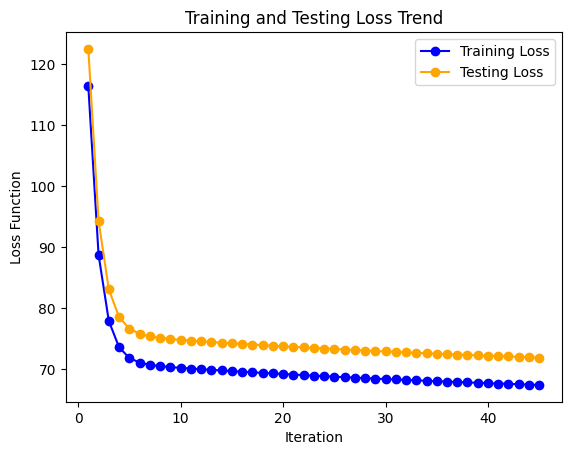

In [94]:
gradient_descent(b=10, a1=10, a2=10, a4=10, a5=10, a7=10, a8=10, iteration=45, learning_rate=0.1)

In [95]:
#MSE After 4 feature Elimination
MSE(b=8.1169, a1=7.8665, a2=9.6432, a3=0, a4=7.3811, a5=5.1213, a6=0, a7=8.4953, a8=9.4437, a9=0, a10=0 )

MSE is: 71.86223019879446
  


In [96]:
#MSE for Comparison with 4 feature Elimination
MSE(b=8.1169, a1=7.8665, a2=9.6432, a3=0, a4=7.3811, a5=5.1213, a6=0, a7=8.4953, a8=9.4437, a9=0, a10=0 )

MSE is: 71.86223019879446
  


#[89.254, 71.387, 93.4416,71.9878, 74.0987, 71.234 ]

# Comparison between MSE after 4 (71.86223) and 0 ones[],
#(a8) Shimmer should be removed.

In [97]:
# Function for four Variable
#rpde a1 - shimmer_APQ5 a2 - nhr a3 - dfa a4 - Shimmer_dB a5 - shimmer_APQ11 a6 - ppe a7 - shimmer a8 - test_time a9 - age a10

def gradient_descent(b, a1, a2, a4, a5, a7, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Third a
  #a3
  # Forth a
  a4
  # Fifth a
  a5
  # 6th a
  #a6
   # 7th a
  a7
   # 8th a
  #a8

  # 9th a
  #a9

  # 10th a
  #a10

  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a4 * dfa_test + \
                                           a5 * Shimmer_dB_test + a7* ppe_test ))**2)/n_test

    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train )))/n_train

    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train

    #   Deravitave a_3
    #derivative_a3 = sum(-2* nhr_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_4
    derivative_a4 = sum(-2* dfa_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train

    # Deravitave a_5
    derivative_a5 = sum(-2* Shimmer_dB_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train )))/n_train

    #   Deravitave a_6
    #derivative_a6 = sum(-2* shimmer_APQ11_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

     #   Deravitave a_7
    derivative_a7 = sum(-2* ppe_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train  )))/n_train

    #   Deravitave a_8
    #derivative_a8 = sum(-2* shimmer_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                    #          + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_9
    #derivative_a9 = sum(-2* test_time_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
    #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_10
    #derivative_a10 = sum(-2* age_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train
    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a4 = {derivative_a4}, \
     slope a5 = {derivative_a5}, slope a7 = {derivative_a7}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      #step_a3 = derivative_a3 * learning_rate
      #a3 = a3 - step_a3

      step_a4 = derivative_a4 * learning_rate
      a4 = a4 - step_a4

      step_a5 = derivative_a5 * learning_rate
      a5 = a5 - step_a5

      #step_a6 = derivative_a6 * learning_rate
      #a6 = a6 - step_a6

      step_a7 = derivative_a7 * learning_rate
      a7 = a7 - step_a7

      #step_a8 = derivative_a8 * learning_rate
      #a8 = a8 - step_a8

      #step_a9 = derivative_a9 * learning_rate
      #a9 = a9 - step_a9

      #step_a10 = derivative_a10 * learning_rate
      #a10 = a10 - step_a10


      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  #print(f"a3 is: {a3}")
  print(f"a4 is: {a4}")
  print(f"a5 is: {a5}")
  #print(f"a6 is: {a6}")
  print(f"a7 is: {a7}")
  #print(f"a8 is: {a8}")
  #print(f"a9 is: {a9}")
  #print(f"a10 is: {a10}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

 Iteration 1, slope a1 = 6.980967396383405, slope a2 = 0.3386691613844854, slope a4 = 8.359594161047193,      slope a5 = 5.064688212076843, slope a7 = 3.0287189728522863, slope b = 12.252095963035025, loss-train = 110.52506814717032, loss-test = 116.61541346249194
 Iteration 2, slope a1 = 4.380017176372216, slope a2 = 0.23717057726790286, slope a4 = 5.2419754213982985,      slope a5 = 3.505148250189744, slope a7 = 1.9594431775521706, slope b = 7.503979709688792, loss-train = 85.83637265883348, loss-test = 91.36387605487562
 Iteration 3, slope a1 = 2.7548997537332074, slope a2 = 0.17351023720173633, slope a4 = 3.2948799227549093,      slope a5 = 2.5273057679810393, slope a7 = 1.2906427651147816, slope b = 4.538880799424521, loss-train = 76.1373310947467, loss-test = 81.31017356757187
 Iteration 4, slope a1 = 1.7394058736888238, slope a2 = 0.13349079244028034, slope a4 = 2.0790256910896505,      slope a5 = 1.912897902990151, slope a7 = 0.872035004358412, slope b = 2.687654018578924, loss

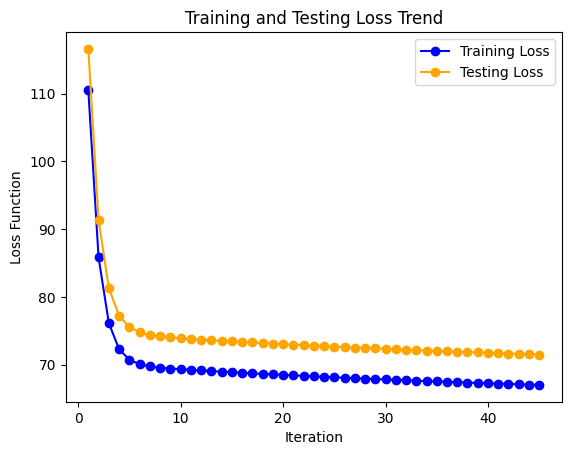

In [98]:
gradient_descent(b = 10, a1 = 10, a2 = 10, a4 = 10, a5 = 10, a7 = 10, iteration=45, learning_rate = 0.1)

In [99]:
#MSE After 5 feature Elimination
MSE(b=8.1963, a1=7.9786, a2=9.6724, a3=0, a4=7.4432, a5=5.5292, a6=0, a7=8.5974, a8=0, a9=0, a10=0 )

MSE is: 71.44395051389478
  


$Final\ Model\ for\ Backward\ stepwise\ linear\ regression$
#Y = 8.1963 + 7.9786X1(RPDE) + 9.6724X2(shimmer_APQ5) + 7.4432X4(DFA) + 5.5292X5(shimmer_dB) + 8.5974X7(PPE)

$Question\ 3\ c$
# I think the forward model works better than backward based on the convergence ability. It is converged way faster with less steps.
Badan bia MSE final Model ham moghaise kon

$Final\ Model\ for\ Backward\ stepwise\ linear\ regression$
#Y = 8.1963 + 7.9786X1(RPDE) + 9.6724X2(shimmer_APQ5) + 7.4432X4(DFA) + 5.5292X5(shimmer_dB) + 8.5974X7(PPE)

$ Final\ Model\ from\ Forward\ stepwise\ linear\ regression$
# Y = 8.096230084760895 + 8.610332162289275 * X(rpde) + 10.152944995345264 * X(shimmer_APQ5) + 9.575147049011013 * X(NHR) + 8.342166327039113 * X(DFA) + 7.861858176505558 * X(shimmer_dB)

Y = 8.096230084760895 + 8.610332162289275 * X(rpde) + 10.152944995345264 * X(shimmer_APQ5) + 9.575147049011013 * X(NHR) + 8.342166327039113 * X(DFA) + 7.861858176505558 * X(shimmer_dB)


$End\ of\ Part\ 3$

$Part\ 4$

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Reading the dataset
dataset = pd.read_csv("/content/parkinsons_dataset.csv")
dataset.sample(2)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
1750,13,73,1,63.572,16.691,24.618,0.00529,0.000027,0.00297,0.00259,...,0.232,0.01109,0.01214,0.01701,0.03327,0.037594,22.670,0.50385,0.60107,0.27013
47,1,72,0,166.640,36.443,47.257,0.00419,0.000028,0.00131,0.00168,...,0.236,0.01074,0.01354,0.02499,0.03221,0.018860,24.292,0.56615,0.57068,0.18185


$Assigning\ data\ to\ two\ different\ parts:$

$Training\qquad and\qquad Test$# This is formatted as code

In [101]:
# set the random seed for reprocibility
seed = 1

# Shuffle the DataFrame rows without setting a seed
shuffled_dataset = dataset.sample(frac=1, random_state=seed)


#70% training and 30% testing
split_index = int(0.7 * len(shuffled_dataset))

#spliting data
train_dataset = shuffled_dataset.iloc[: split_index]
test_dataset = shuffled_dataset.iloc[split_index :]

print(f"number of whole dataset rows is: {len(dataset)}")
print(f"number of train rows is: {len(train_dataset)}")
print(f"number of train rows is: {len(test_dataset)}")

number of whole dataset rows is: 5875
number of train rows is: 4112
number of train rows is: 1763


In [102]:
#1
motor_UPDRS_train = train_dataset ['motor_UPDRS']
motor_UPDRS_test = test_dataset ['motor_UPDRS']
#2
rpde_train = train_dataset['RPDE']
rpde_test = test_dataset['RPDE']
#3
shimmer_APQ5_train = train_dataset['Shimmer:APQ5']
shimmer_APQ5_test = test_dataset['Shimmer:APQ5']
#4
dfa_train = train_dataset['DFA']
dfa_test = test_dataset['DFA']
#5
nhr_train = train_dataset['NHR']
nhr_test = test_dataset['NHR']
#6
Shimmer_dB_train = train_dataset['Shimmer(dB)']
Shimmer_dB_test = test_dataset['Shimmer(dB)']
#7
test_time_train = train_dataset['test_time']
test_time_test = test_dataset['test_time']
#8
age_train = train_dataset['age']
age_test = test_dataset['age']
#9
shimmer_APQ11_train = train_dataset['Shimmer:APQ11']
shimmer_APQ11_test = test_dataset['Shimmer:APQ11']
#10
ppe_train = train_dataset['PPE']
ppe_test = test_dataset['PPE']
#11
shimmer_train = train_dataset['Shimmer']
shimmer_test = test_dataset['Shimmer']

In [103]:
# Number of Train and Test Data
n_train = train_dataset.shape[0]
n_test = test_dataset.shape[0]
print(f"number of Training dataset: {n_train}")
print(f"number of Test dataset: {n_test}")

number of Training dataset: 4112
number of Test dataset: 1763


#From Q3, I choose the Backward regression Model for regularization


#Y = 8.1963 + 7.9786X1(RPDE) + 9.6724X2(shimmer_APQ5) + 7.4432X4(DFA) + 5.5292X5(shimmer_dB) + 8.5974X7(PPE)

In [104]:
# Function for four Variable
#rpde a1 - shimmer_APQ5 a2 - nhr a3 - dfa a4 - Shimmer_dB a5 - shimmer_APQ11 a6 - ppe a7 - shimmer a8 - test_time a9 - age a10

def gradient_descent(b, a1, a2, a4, a5, a7, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Third a
  #a3
  # Forth a
  a4
  # Fifth a
  a5
  # 6th a
  #a6
   # 7th a
  a7
   # 8th a
  #a8

  # 9th a
  #a9

  # 10th a
  #a10

  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []



  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a4 * dfa_test + \
                                           a5 * Shimmer_dB_test + a7* ppe_test ))**2)/n_test

    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train )))/n_train

    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train

    #   Deravitave a_3
    #derivative_a3 = sum(-2* nhr_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_4
    derivative_a4 = sum(-2* dfa_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train

    # Deravitave a_5
    derivative_a5 = sum(-2* Shimmer_dB_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train )))/n_train

    #   Deravitave a_6
    #derivative_a6 = sum(-2* shimmer_APQ11_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

     #   Deravitave a_7
    derivative_a7 = sum(-2* ppe_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train  )))/n_train

    #   Deravitave a_8
    #derivative_a8 = sum(-2* shimmer_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                    #          + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_9
    #derivative_a9 = sum(-2* test_time_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
    #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_10
    #derivative_a10 = sum(-2* age_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train
    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a4 = {derivative_a4}, \
     slope a5 = {derivative_a5}, slope a7 = {derivative_a7}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      #step_a3 = derivative_a3 * learning_rate
      #a3 = a3 - step_a3

      step_a4 = derivative_a4 * learning_rate
      a4 = a4 - step_a4

      step_a5 = derivative_a5 * learning_rate
      a5 = a5 - step_a5

      #step_a6 = derivative_a6 * learning_rate
      #a6 = a6 - step_a6

      step_a7 = derivative_a7 * learning_rate
      a7 = a7 - step_a7

      #step_a8 = derivative_a8 * learning_rate
      #a8 = a8 - step_a8

      #step_a9 = derivative_a9 * learning_rate
      #a9 = a9 - step_a9

      #step_a10 = derivative_a10 * learning_rate
      #a10 = a10 - step_a10


      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  #print(f"a3 is: {a3}")
  print(f"a4 is: {a4}")
  print(f"a5 is: {a5}")
  #print(f"a6 is: {a6}")
  print(f"a7 is: {a7}")
  #print(f"a8 is: {a8}")
  #print(f"a9 is: {a9}")
  #print(f"a10 is: {a10}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

$Lasso\ Regularization$

# Regularizaed Loss = Loss + (Lambda * ∑abs(ai))

In [105]:
# Function for four Variable
#rpde a1 - shimmer_APQ5 a2 - nhr a3 - dfa a4 - Shimmer_dB a5 - shimmer_APQ11 a6 - ppe a7 - shimmer a8 - test_time a9 - age a10

def gradient_descent(b, a1, a2, a4, a5, a7, iteration, learning_rate, Lambda, alpha):

  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []
  # Store the trend of training losses - regularized
  loss_train_trend_r = []
  # Store the trend of testing losses - regularized
  loss_test_trend_r = []




  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a4 * dfa_test + \
                                           a5 * Shimmer_dB_test + a7* ppe_test ))**2)/n_test

    #Regularized Loss
    rLoss_test = loss_test + (Lambda * sum([a1, a2 , a4 ,a5, a7]))

    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train ))**2)/n_train
    #Regularized Loss
    rloss_train = loss_train + (Lambda * sum([a1, a2 , a4 ,a5, a7]))


    # Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train )))/n_train
    # Regularized Deravite a_1
    rderivative_a1 = derivative_a1 + Lambda

    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train

    # Regularized Deravite a_2
    rderivative_a2 = derivative_a2 + Lambda

    #   Deravitave a_3
    #derivative_a3 = sum(-2* nhr_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_4
    derivative_a4 = sum(-2* dfa_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train

    # Regularized Deravite a_4
    rderivative_a4 = derivative_a4 + Lambda

    # Deravitave a_5
    derivative_a5 = sum(-2* Shimmer_dB_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train )))/n_train

    # Regularized Deravite a_5
    rderivative_a5 = derivative_a5 + Lambda

    #   Deravitave a_6
    #derivative_a6 = sum(-2* shimmer_APQ11_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

     #   Deravitave a_7
    derivative_a7 = sum(-2* ppe_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train  )))/n_train

    # Regularized Deravite a_7
    rderivative_a7 = derivative_a7 + Lambda


    #   Deravitave a_8
    #derivative_a8 = sum(-2* shimmer_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                    #          + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_9
    #derivative_a9 = sum(-2* test_time_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
    #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_10
    #derivative_a10 = sum(-2* age_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train
    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)
    loss_train_trend_r.append(rloss_train)
    loss_test_trend_r.append(rLoss_test)

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a4 = {derivative_a4}, \
     slope a5 = {derivative_a5}, slope a7 = {derivative_a7}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    print("")

    print(f" Iteration {i+1}, reg-slope a1 = {rderivative_a1}, reg-slope a2 = {rderivative_a2}, reg-slope a4 = {rderivative_a4}, \
     reg-slope a5 = {rderivative_a5}, reg-slope a7 = {rderivative_a7}, reg-loss-train = {rloss_train}, reg-loss-test = {rLoss_test}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1
      #regularized a
      ra1 = a1 - step_a1 - (alpha * step_a1)

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2
      #regularized a
      ra2 = a2 - step_a2 - (alpha * step_a2)

      #step_a3 = derivative_a3 * learning_rate
      #a3 = a3 - step_a3

      step_a4 = derivative_a4 * learning_rate
      a4 = a4 - step_a4
      #regularized a
      ra4 = a4 - step_a4 - (alpha * step_a4)

      step_a5 = derivative_a5 * learning_rate
      a5 = a5 - step_a5
      #regularized a
      ra5 = a5 - step_a5 - (alpha * step_a5)

      #step_a6 = derivative_a6 * learning_rate
      #a6 = a6 - step_a6

      step_a7 = derivative_a7 * learning_rate
      a7 = a7 - step_a7
      #regularized a
      ra7 = a7 - step_a7 - (alpha * step_a7)

      #step_a8 = derivative_a8 * learning_rate
      #a8 = a8 - step_a8

      #step_a9 = derivative_a9 * learning_rate
      #a9 = a9 - step_a9

      #step_a10 = derivative_a10 * learning_rate
      #a10 = a10 - step_a10


      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  #print(f"a3 is: {a3}")
  print(f"a4 is: {a4}")
  print(f"a5 is: {a5}")
  #print(f"a6 is: {a6}")
  print(f"a7 is: {a7}")
  #print(f"a8 is: {a8}")
  #print(f"a9 is: {a9}")
  #print(f"a10 is: {a10}")
  print(f"b is: {b}")
  print("")
  print(f"ra1 is: {ra1}")
  print(f"ra2 is: {ra2}")
  print(f"ra4 is: {ra4}")
  print(f"ra5 is: {ra5}")
  print(f"ra7 is: {ra7}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend_r[::-1], marker="o", label="Training Loss regularized", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend_r[::-1], marker="o", label="Testing Loss regularized", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function regularized')
  plt.title('Training and Testing Loss regularized Trend')
  plt.legend()
  plt.show()

 Iteration 1, slope a1 = 6.980967396383405, slope a2 = 0.3386691613844854, slope a4 = 8.359594161047193,      slope a5 = 5.064688212076843, slope a7 = 3.0287189728522863, slope b = 12.252095963035025, loss-train = 110.52506814717032, loss-test = 116.61541346249194

 Iteration 1, reg-slope a1 = 7.980967396383405, reg-slope a2 = 1.3386691613844854, reg-slope a4 = 9.359594161047193,      reg-slope a5 = 6.064688212076843, reg-slope a7 = 4.028718972852286, reg-loss-train = 160.52506814717032, reg-loss-test = 166.61541346249194
 Iteration 2, slope a1 = 4.380017176372216, slope a2 = 0.23717057726790286, slope a4 = 5.2419754213982985,      slope a5 = 3.505148250189744, slope a7 = 1.9594431775521706, slope b = 7.503979709688792, loss-train = 85.83637265883348, loss-test = 91.36387605487562

 Iteration 2, reg-slope a1 = 5.380017176372216, reg-slope a2 = 1.237170577267903, reg-slope a4 = 6.2419754213982985,      reg-slope a5 = 4.505148250189745, reg-slope a7 = 2.9594431775521706, reg-loss-train =

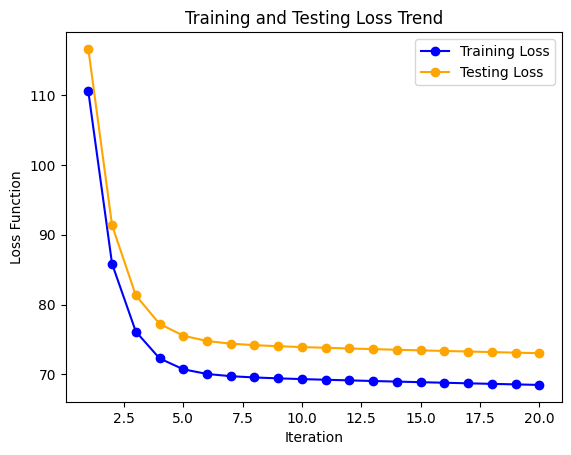

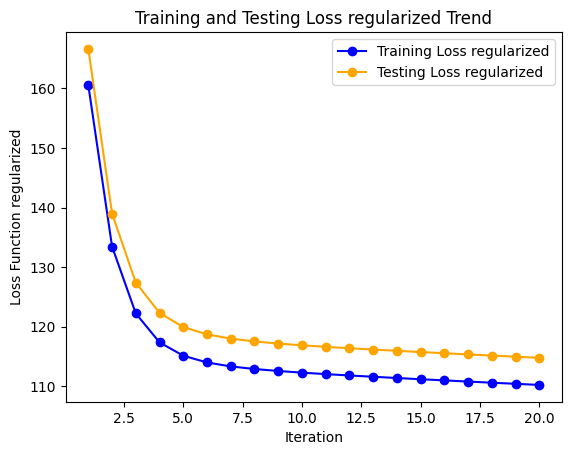

In [106]:
gradient_descent(b=10, a1=10, a2=10, a4=10, a5=10, a7=10, iteration=20, learning_rate=0.1, Lambda=1, alpha=0.1)

 Iteration 1, slope a1 = 6.980967396383405, slope a2 = 0.3386691613844854, slope a4 = 8.359594161047193,      slope a5 = 5.064688212076843, slope a7 = 3.0287189728522863, slope b = 12.252095963035025, loss-train = 110.52506814717032, loss-test = 116.61541346249194

 Iteration 1, reg-slope a1 = 7.0809673963834046, reg-slope a2 = 0.4386691613844854, reg-slope a4 = 8.459594161047193,      reg-slope a5 = 5.164688212076842, reg-slope a7 = 3.1287189728522864, reg-loss-train = 115.52506814717032, reg-loss-test = 121.61541346249194
 Iteration 2, slope a1 = 4.380017176372216, slope a2 = 0.23717057726790286, slope a4 = 5.2419754213982985,      slope a5 = 3.505148250189744, slope a7 = 1.9594431775521706, slope b = 7.503979709688792, loss-train = 85.83637265883348, loss-test = 91.36387605487562

 Iteration 2, reg-slope a1 = 4.480017176372216, reg-slope a2 = 0.3371705772679029, reg-slope a4 = 5.341975421398298,      reg-slope a5 = 3.6051482501897443, reg-slope a7 = 2.0594431775521707, reg-loss-trai

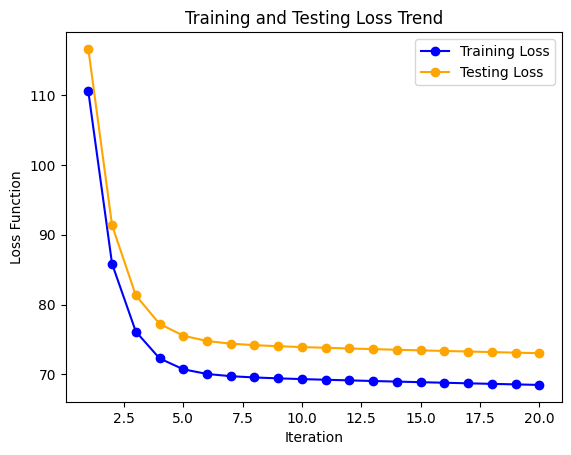

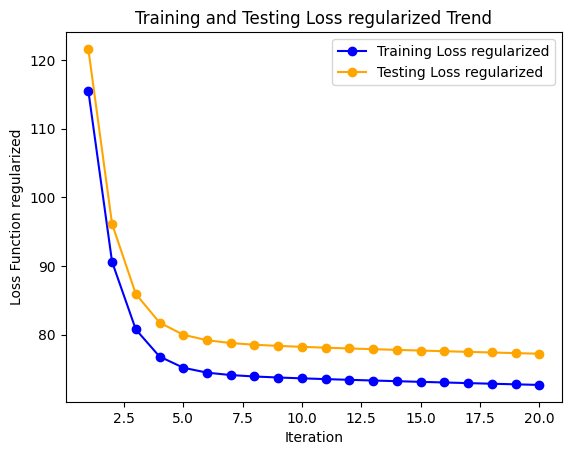

In [107]:
gradient_descent(b=10, a1=10, a2=10, a4=10, a5=10, a7=10, iteration=20, learning_rate=0.1, Lambda=0.1, alpha=0.1)

 Iteration 1, slope a1 = 6.980967396383405, slope a2 = 0.3386691613844854, slope a4 = 8.359594161047193,      slope a5 = 5.064688212076843, slope a7 = 3.0287189728522863, slope b = 12.252095963035025, loss-train = 110.52506814717032, loss-test = 116.61541346249194

 Iteration 1, reg-slope a1 = 16.980967396383406, reg-slope a2 = 10.338669161384486, reg-slope a4 = 18.35959416104719,      reg-slope a5 = 15.064688212076842, reg-slope a7 = 13.028718972852285, reg-loss-train = 610.5250681471703, reg-loss-test = 616.6154134624919
 Iteration 2, slope a1 = 4.380017176372216, slope a2 = 0.23717057726790286, slope a4 = 5.2419754213982985,      slope a5 = 3.505148250189744, slope a7 = 1.9594431775521706, slope b = 7.503979709688792, loss-train = 85.83637265883348, loss-test = 91.36387605487562

 Iteration 2, reg-slope a1 = 14.380017176372217, reg-slope a2 = 10.237170577267904, reg-slope a4 = 15.241975421398298,      reg-slope a5 = 13.505148250189745, reg-slope a7 = 11.95944317755217, reg-loss-trai

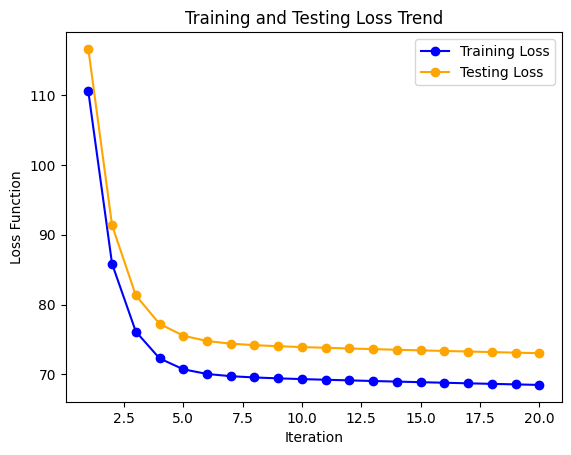

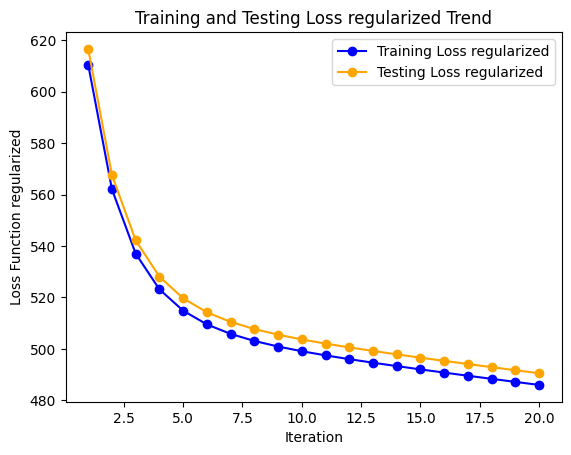

In [108]:
gradient_descent(b=10, a1=10, a2=10, a4=10, a5=10, a7=10, iteration=20, learning_rate=0.1, Lambda=10, alpha=0.1)

 Iteration 1, slope a1 = 6.980967396383405, slope a2 = 0.3386691613844854, slope a4 = 8.359594161047193,      slope a5 = 5.064688212076843, slope a7 = 3.0287189728522863, slope b = 12.252095963035025, loss-train = 110.52506814717032, loss-test = 116.61541346249194

 Iteration 1, reg-slope a1 = 106.9809673963834, reg-slope a2 = 100.33866916138449, reg-slope a4 = 108.3595941610472,      reg-slope a5 = 105.06468821207685, reg-slope a7 = 103.02871897285229, reg-loss-train = 5110.525068147171, reg-loss-test = 5116.615413462492
 Iteration 2, slope a1 = 4.380017176372216, slope a2 = 0.23717057726790286, slope a4 = 5.2419754213982985,      slope a5 = 3.505148250189744, slope a7 = 1.9594431775521706, slope b = 7.503979709688792, loss-train = 85.83637265883348, loss-test = 91.36387605487562

 Iteration 2, reg-slope a1 = 104.38001717637222, reg-slope a2 = 100.2371705772679, reg-slope a4 = 105.2419754213983,      reg-slope a5 = 103.50514825018975, reg-slope a7 = 101.95944317755217, reg-loss-train 

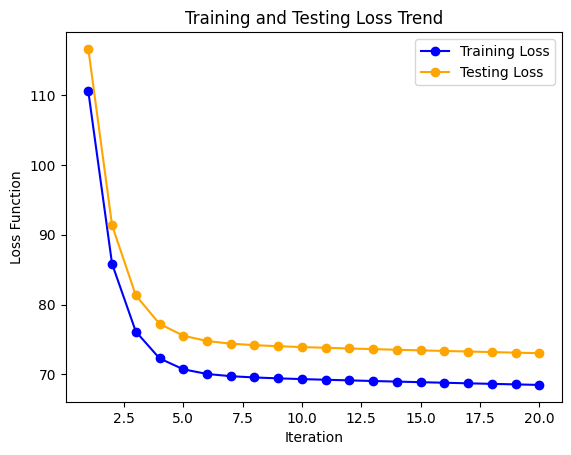

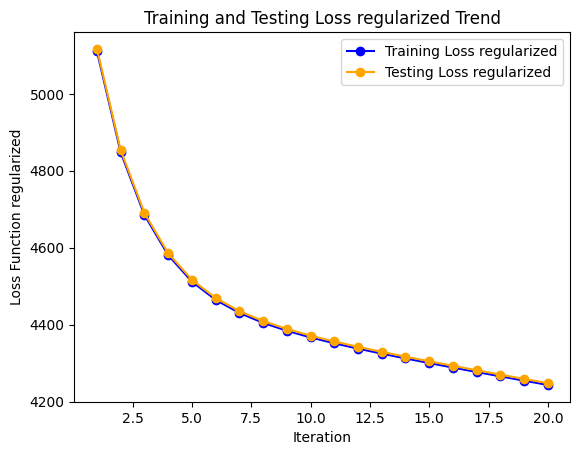

In [109]:
gradient_descent(b=10, a1=10, a2=10, a4=10, a5=10, a7=10, iteration=20, learning_rate=0.1, Lambda=100, alpha=0.1)

 Iteration 1, slope a1 = 6.980967396383405, slope a2 = 0.3386691613844854, slope a4 = 8.359594161047193,      slope a5 = 5.064688212076843, slope a7 = 3.0287189728522863, slope b = 12.252095963035025, loss-train = 110.52506814717032, loss-test = 116.61541346249194

 Iteration 1, reg-slope a1 = 7.980967396383405, reg-slope a2 = 1.3386691613844854, reg-slope a4 = 9.359594161047193,      reg-slope a5 = 6.064688212076843, reg-slope a7 = 4.028718972852286, reg-loss-train = 160.52506814717032, reg-loss-test = 166.61541346249194
 Iteration 2, slope a1 = 4.380017176372216, slope a2 = 0.23717057726790286, slope a4 = 5.2419754213982985,      slope a5 = 3.505148250189744, slope a7 = 1.9594431775521706, slope b = 7.503979709688792, loss-train = 85.83637265883348, loss-test = 91.36387605487562

 Iteration 2, reg-slope a1 = 5.380017176372216, reg-slope a2 = 1.237170577267903, reg-slope a4 = 6.2419754213982985,      reg-slope a5 = 4.505148250189745, reg-slope a7 = 2.9594431775521706, reg-loss-train =

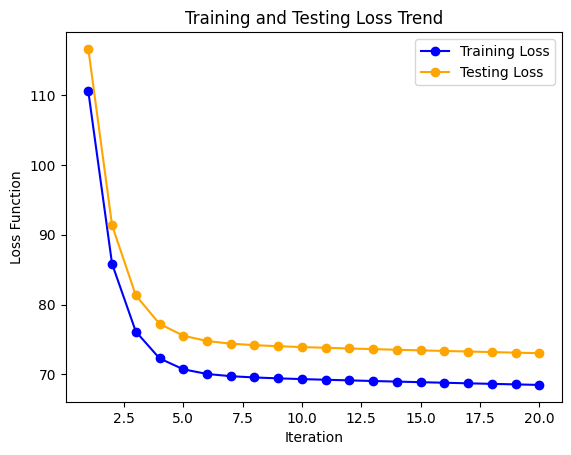

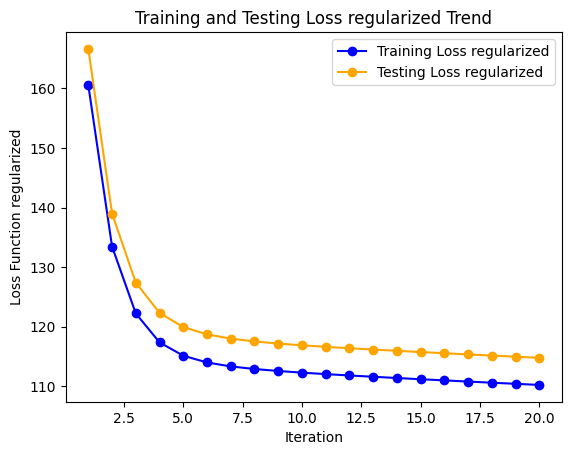

In [110]:
gradient_descent(b=10, a1=10, a2=10, a4=10, a5=10, a7=10, iteration=20, learning_rate=0.1, Lambda=1, alpha=0.01)

 Iteration 1, slope a1 = 6.980967396383405, slope a2 = 0.3386691613844854, slope a4 = 8.359594161047193,      slope a5 = 5.064688212076843, slope a7 = 3.0287189728522863, slope b = 12.252095963035025, loss-train = 110.52506814717032, loss-test = 116.61541346249194

 Iteration 1, reg-slope a1 = 7.0809673963834046, reg-slope a2 = 0.4386691613844854, reg-slope a4 = 8.459594161047193,      reg-slope a5 = 5.164688212076842, reg-slope a7 = 3.1287189728522864, reg-loss-train = 115.52506814717032, reg-loss-test = 121.61541346249194
 Iteration 2, slope a1 = 4.380017176372216, slope a2 = 0.23717057726790286, slope a4 = 5.2419754213982985,      slope a5 = 3.505148250189744, slope a7 = 1.9594431775521706, slope b = 7.503979709688792, loss-train = 85.83637265883348, loss-test = 91.36387605487562

 Iteration 2, reg-slope a1 = 4.480017176372216, reg-slope a2 = 0.3371705772679029, reg-slope a4 = 5.341975421398298,      reg-slope a5 = 3.6051482501897443, reg-slope a7 = 2.0594431775521707, reg-loss-trai

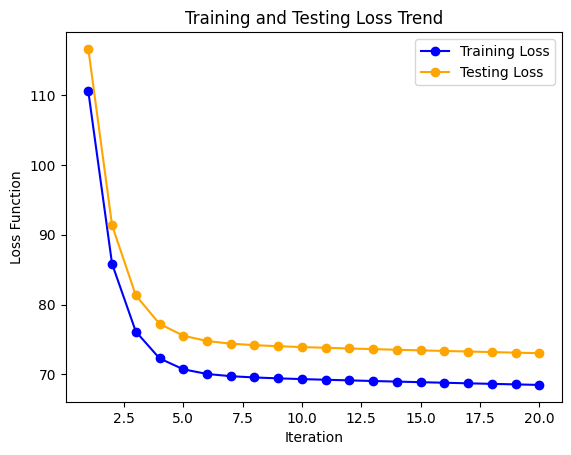

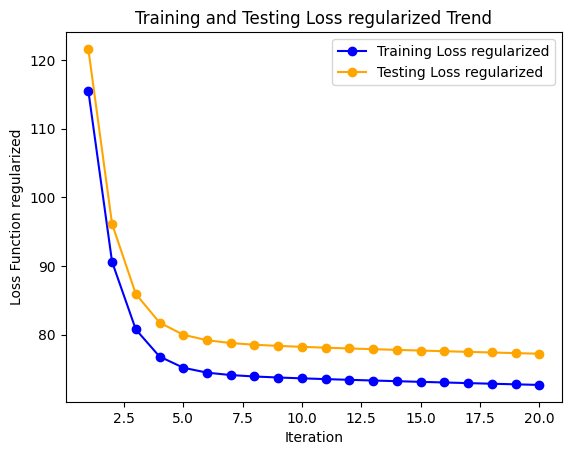

In [111]:
gradient_descent(b=10, a1=10, a2=10, a4=10, a5=10, a7=10, iteration=20, learning_rate=0.1, Lambda=0.1, alpha=0.01)

$Feature\ Scaling$

#Normalization is good to use when the distribution of data does not follow a Gaussian distribution. It can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors.

# The general formula for normalization:

$\ x' = \frac{x - min(x)}{max(x) - min(x)}$

In [112]:
#1
motor_UPDRS_train = train_dataset ['motor_UPDRS']

min_motor_UPDRS_train = np.min(motor_UPDRS_train)
max_motor_UPDRS_train = np.max(motor_UPDRS_train)
print(f"min_motor_UPDRS_train is {min_motor_UPDRS_train}, max_motor_UPDRS_train is {max_motor_UPDRS_train} ")
print("")
#Nomralization
motor_UPDRS_train_n = (motor_UPDRS_train - min_motor_UPDRS_train)/(max_motor_UPDRS_train - min_motor_UPDRS_train)

motor_UPDRS_test = test_dataset ['motor_UPDRS']

min_motor_UPDRS_test = np.min(motor_UPDRS_test)
max_motor_UPDRS_test = np.max(motor_UPDRS_test)
print(f"min_motor_UPDRS_test is {min_motor_UPDRS_test}, max_motor_UPDRS_test is {max_motor_UPDRS_test} ")
print("")
#Nomralization
motor_UPDRS_test_n = (motor_UPDRS_test - min_motor_UPDRS_test)/(max_motor_UPDRS_test - min_motor_UPDRS_test)

#2
rpde_train = train_dataset['RPDE']

min_rpde_train = np.min(rpde_train)
max_rpde_train = np.max(rpde_train)
print(f"min_rpde_train is {min_rpde_train}, max_rpde_train is {max_rpde_train} ")
print("")
#Nomralization
rpde_train_n = (rpde_train - min_rpde_train)/(max_rpde_train - min_rpde_train)

rpde_test = test_dataset['RPDE']

min_rpde_test = np.min(rpde_test)
max_rpde_test = np.max(rpde_test)
print(f"min_rpde_test is {min_rpde_train}, max_rpde_test is {max_rpde_test} ")
print("")
#Nomralization
rpde_test_n = (rpde_test - min_rpde_test)/(max_rpde_test - min_rpde_test)

#3

shimmer_APQ5_train = train_dataset['Shimmer:APQ5']

min_shimmer_APQ5_train = np.min(shimmer_APQ5_train)
max_shimmer_APQ5_train = np.max(shimmer_APQ5_train)

print(f"min_shimmer_APQ5_train is {min_shimmer_APQ5_train}, max_shimmer_APQ5_train is {max_shimmer_APQ5_train} ")
print("")
#Nomralization
shimmer_APQ5_train_n = (shimmer_APQ5_train - min_shimmer_APQ5_train)/(max_shimmer_APQ5_train - min_shimmer_APQ5_train)

shimmer_APQ5_test = test_dataset['Shimmer:APQ5']

min_shimmer_APQ5_test = np.min(shimmer_APQ5_test)
max_shimmer_APQ5_test = np.max(shimmer_APQ5_test)

print(f"min_shimmer_APQ5_test is {min_shimmer_APQ5_test}, max_shimmer_APQ5_test is {max_shimmer_APQ5_test}")
print("")
#Nomralization
shimmer_APQ5_test_n = (shimmer_APQ5_test - min_shimmer_APQ5_test)/(max_shimmer_APQ5_test - min_shimmer_APQ5_test)

#4
dfa_train = train_dataset['DFA']
min_dfa_train = np.min(dfa_train)
max_dfa_train= np.max(dfa_train)

min_dfa_train = np.min(dfa_train)
max_dfa_train = np.max(dfa_train)
print(f"min_dfa_train is {min_dfa_train}, max_dfa_train is {max_dfa_train}")
print("")
#Nomralization
dfa_train_n = (dfa_train - min_dfa_train)/(max_dfa_train - min_dfa_train)

dfa_test = test_dataset['DFA']

min_dfa_test = np.min(dfa_test)
max_dfa_test= np.max(dfa_test)

min_dfa_test = np.min(dfa_test)
max_dfa_test = np.max(dfa_test)
print(f"min_dfa_test is {min_dfa_test}, max_dfa_test is {max_dfa_test}")
print("")
#Nomralization
dfa_test_n = (dfa_test - min_dfa_test)/(max_dfa_test - min_dfa_test)


#5
nhr_train = train_dataset['NHR']

min_nhr_train = np.min(nhr_train)
max_nhr_train= np.max(nhr_train)

min_nhr_train = np.min(nhr_train)
max_nhr_train = np.max(nhr_train)
print(f"min_nhr_train is {min_nhr_train}, max_nhr_train is {max_nhr_train}")
print("")

nhr_test = test_dataset['NHR']

min_nhr_test = np.min(nhr_test)
max_nhr_test= np.max(nhr_test)

min_nhr_test = np.min(nhr_test)
max_nhr_test = np.max(nhr_test)
print(f"min_nhr_test is {min_nhr_test}, max_nhr_test is {max_nhr_test}")
print("")

#6
Shimmer_dB_train = train_dataset['Shimmer(dB)']

min_Shimmer_dB_train = np.min(Shimmer_dB_train)
max_Shimmer_dB_train= np.max(Shimmer_dB_train)

min_Shimmer_dB_train = np.min(Shimmer_dB_train)
max_Shimmer_dB_train = np.max(Shimmer_dB_train)
print(f"min_Shimmer_dB_train is {min_Shimmer_dB_train}, max_Shimmer_dB_train is {max_Shimmer_dB_train}")
print("")
#Nomralization
Shimmer_dB_train_n = (Shimmer_dB_train - min_Shimmer_dB_train)/(max_Shimmer_dB_train - min_Shimmer_dB_train)

Shimmer_dB_test = test_dataset['Shimmer(dB)']

min_Shimmer_dB_test = np.min(Shimmer_dB_test)
max_Shimmer_dB_test= np.max(Shimmer_dB_test)

min_Shimmer_dB_test = np.min(Shimmer_dB_test)
max_Shimmer_dB_test = np.max(Shimmer_dB_test)
print(f"min_Shimmer_dB_test is {min_Shimmer_dB_test}, max_Shimmer_dB_test is {max_Shimmer_dB_test}")
print("")
#Normalization
Shimmer_dB_test_n = (Shimmer_dB_test - min_Shimmer_dB_test)/(max_Shimmer_dB_test - min_Shimmer_dB_test)

#7
test_time_train = train_dataset['test_time']

test_time_test = test_dataset['test_time']

#8
age_train = train_dataset['age']
age_test = test_dataset['age']
#9
shimmer_APQ11_train = train_dataset['Shimmer:APQ11']
shimmer_APQ11_test = test_dataset['Shimmer:APQ11']
#10
ppe_train = train_dataset['PPE']
min_ppe_train = np.min(ppe_train)
max_ppe_train= np.max(ppe_train)

min_ppe_train = np.min(ppe_train)
max_ppe_train = np.max(ppe_train)
print(f"min_ppe_train is {min_ppe_train}, max_ppe_train is {max_ppe_train}")
print("")
#Nomralization
ppe_train_n = (ppe_train - min_ppe_train)/(max_ppe_train - min_ppe_train)

ppe_test = test_dataset['PPE']
min_ppe_test = np.min(ppe_test)
max_ppe_test= np.max(ppe_test)

min_ppe_test = np.min(ppe_test)
max_ppe_test = np.max(ppe_test)
print(f"min_ppe_test is {min_ppe_test}, max_ppe_test is {max_ppe_test}")
print("")
#Normalization
ppe_test_n = (ppe_test - min_ppe_test)/(max_ppe_test - min_ppe_test)
print(ppe_test_n)
print(ppe_test)

#11
shimmer_train = train_dataset['Shimmer']
shimmer_test = test_dataset['Shimmer']

min_motor_UPDRS_train is 5.0377, max_motor_UPDRS_train is 39.511 

min_motor_UPDRS_test is 5.0377, max_motor_UPDRS_test is 39.511 

min_rpde_train is 0.15102, max_rpde_train is 0.96608 

min_rpde_test is 0.15102, max_rpde_test is 0.94792 

min_shimmer_APQ5_train is 0.00205, max_shimmer_APQ5_train is 0.16246 

min_shimmer_APQ5_test is 0.00194, max_shimmer_APQ5_test is 0.16702

min_dfa_train is 0.51404, max_dfa_train is 0.8656

min_dfa_test is 0.51655, max_dfa_test is 0.8286

min_nhr_train is 0.000286, max_nhr_train is 0.73899

min_nhr_test is 0.000626, max_nhr_test is 0.74826

min_Shimmer_dB_train is 0.03, max_Shimmer_dB_train is 2.107

min_Shimmer_dB_test is 0.026, max_Shimmer_dB_test is 1.877

min_ppe_train is 0.021983, max_ppe_train is 0.73173

min_ppe_test is 0.026336, max_ppe_test is 0.6779

2317    0.119058
4469    0.408301
4338    0.371589
972     0.261822
4677    0.181017
          ...   
905     0.705478
5192    0.284614
3980    0.229945
235     0.280071
5157    0.337824
Name: 

In [113]:
# Function for four Variable
#rpde a1 - shimmer_APQ5 a2 - nhr a3 - dfa a4 - Shimmer_dB a5 - shimmer_APQ11 a6 - ppe a7 - shimmer a8 - test_time a9 - age a10

def gradient_descent(b, a1, a2, a4, a5, a7, iteration, learning_rate):
  # First b
  b
  # First a
  a1
  # Second a
  a2
  # Third a
  #a3
  # Forth a
  a4
  # Fifth a
  a5
  # 6th a
  #a6
   # 7th a
  a7
   # 8th a
  #a8

  # 9th a
  #a9

  # 10th a
  #a10

  # Iteration
  iteration
  learning_rate
  # to store the trend of the derivative agianst a
  slope_trend = []
  # Store the trend of training losses
  loss_train_trend = []
  # Store the trend of testing losses
  loss_test_trend = []
  # Store the trend of training losses normal
  loss_train_trend_n = []
  # Store the trend of testing losses normal
  loss_test_trend_n = []




  for i in range (iteration):

    loss_test = sum (( motor_UPDRS_test - (b + a1*rpde_test + a2*shimmer_APQ5_test + a4 * dfa_test + \
                                           a5 * Shimmer_dB_test + a7* ppe_test ))**2)/n_test

    #Normalized
    loss_test_n = sum (( motor_UPDRS_test_n - (b + a1*rpde_test_n + a2*shimmer_APQ5_test_n + a4 * dfa_test_n + \
                                           a5 * Shimmer_dB_test_n + a7* ppe_test_n ))**2)/n_test

    loss_train =  sum (( motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train ))**2)/n_train
    #Normalized
    loss_train_n =  sum (( motor_UPDRS_train_n - (b + a1*rpde_train_n + a2*shimmer_APQ5_train_n + a4 * dfa_train_n \
                                              + a5 * Shimmer_dB_train_n + a7* ppe_train_n ))**2)/n_train

    #   Deravitave a_1
    derivative_a1 = sum(-2*rpde_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train )))/n_train

    #   Deravitave a_1 normalized
    derivative_a1_n = sum(-2*rpde_train_n * (motor_UPDRS_train_n - (b + a1*rpde_train_n + a2*shimmer_APQ5_train_n + a4 * dfa_train_n \
                                              + a5 * Shimmer_dB_train_n +  a7* ppe_train_n )))/n_train



    #   Deravitave a_2
    derivative_a2 = sum(-2*shimmer_APQ5_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train

     #   Deravitave a_2_normailzed
    derivative_a2_n = sum(-2*shimmer_APQ5_train_n * (motor_UPDRS_train_n - (b + a1*rpde_train_n + a2*shimmer_APQ5_train_n + a4 * dfa_train_n \
                                              + a5 * Shimmer_dB_train_n + a7* ppe_train_n )))/n_train

    #   Deravitave a_3
    #derivative_a3 = sum(-2* nhr_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train +  a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_4
    derivative_a4 = sum(-2* dfa_train * (motor_UPDRS_train - (b + a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train

     #   Deravitave a_4 normalized
    derivative_a4_n = sum(-2* dfa_train_n * (motor_UPDRS_train_n - (b + a1*rpde_train_n + a2*shimmer_APQ5_train_n + a4 * dfa_train_n \
                                              + a5 * Shimmer_dB_train_n + a7* ppe_train_n )))/n_train

    # Deravitave a_5
    derivative_a5 = sum(-2* Shimmer_dB_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train )))/n_train

     # Deravitave a_5 normalized
    derivative_a5_n = sum(-2* Shimmer_dB_train_n * (motor_UPDRS_train_n - (b+ a1*rpde_train_n + a2*shimmer_APQ5_train_n + a4 * dfa_train_n \
                                              + a5 * Shimmer_dB_train_n +  a7* ppe_train_n )))/n_train

    #   Deravitave a_6
    #derivative_a6 = sum(-2* shimmer_APQ11_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

     #   Deravitave a_7
    derivative_a7 = sum(-2* ppe_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train +  a7* ppe_train  )))/n_train

     #   Deravitave a_7 normalized
    derivative_a7_n = sum(-2* ppe_train_n * (motor_UPDRS_train_n - (b+ a1*rpde_train_n + a2*shimmer_APQ5_train_n + a4 * dfa_train_n \
                                              + a5 * Shimmer_dB_train_n +  a7* ppe_train_n  )))/n_train

    #   Deravitave a_8
    #derivative_a8 = sum(-2* shimmer_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                    #          + a5 * Shimmer_dB_train + a7* ppe_train + a8 * shimmer_train  )))/n_train

    #   Deravitave a_9
    #derivative_a9 = sum(-2* test_time_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
    #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train + a9*test_time_train +a10 * age_train )))/n_train

    #   Deravitave a_10
    #derivative_a10 = sum(-2* age_train * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a3*nhr_train + a4 * dfa_train \
     #                                         + a5 * Shimmer_dB_train + a6 * shimmer_APQ11_train + a7* ppe_train + a8 * shimmer_train +a10 * age_train )))/n_train
    #   Deravitave b
    derivative_b = sum(-2 * (motor_UPDRS_train - (b+ a1*rpde_train + a2*shimmer_APQ5_train + a4 * dfa_train \
                                              + a5 * Shimmer_dB_train + a7* ppe_train )))/n_train

     #   Deravitave b normilized
    derivative_b_n = sum(-2 * (motor_UPDRS_train_n - (b+ a1*rpde_train_n + a2*shimmer_APQ5_train_n + a4 * dfa_train_n \
                                              + a5 * Shimmer_dB_train_n + a7* ppe_train_n )))/n_train


    slope_trend.append(loss_train)
    loss_train_trend.append(loss_train)
    loss_test_trend.append(loss_test)
    loss_train_trend_n.append(loss_train_n)
    loss_test_trend_n.append(loss_test_n)
    print("")

    print(f" Iteration {i+1}, slope a1 = {derivative_a1}, slope a2 = {derivative_a2}, slope a4 = {derivative_a4}, \
     slope a5 = {derivative_a5}, slope a7 = {derivative_a7}, slope b = {derivative_b}, loss-train = {loss_train}, loss-test = {loss_test}")

    print("")

    print(f" Iteration {i+1}, slope a1_n = {derivative_a1_n}, slope a2_n = {derivative_a2_n}, slope a4_n = {derivative_a4_n}, \
     slope a5_n = {derivative_a5_n}, slope a7_n = {derivative_a7_n}, slope b_n = {derivative_b_n}, loss-train_n = {loss_train_n}, loss-test_n = {loss_test_n}")

    if abs(derivative_a1) < 10**-6  or abs(derivative_b) < 10**-6 or i > 0 and abs(slope_trend[i-1] - slope_trend[i]) < 0.0001:
      break

    else:
      step_a1 = derivative_a1 * learning_rate
      a1 = a1 - step_a1

      step_a2 = derivative_a2 * learning_rate
      a2 = a2 - step_a2

      #step_a3 = derivative_a3 * learning_rate
      #a3 = a3 - step_a3

      step_a4 = derivative_a4 * learning_rate
      a4 = a4 - step_a4

      step_a5 = derivative_a5 * learning_rate
      a5 = a5 - step_a5

      #step_a6 = derivative_a6 * learning_rate
      #a6 = a6 - step_a6

      step_a7 = derivative_a7 * learning_rate
      a7 = a7 - step_a7

      #step_a8 = derivative_a8 * learning_rate
      #a8 = a8 - step_a8

      #step_a9 = derivative_a9 * learning_rate
      #a9 = a9 - step_a9

      #step_a10 = derivative_a10 * learning_rate
      #a10 = a10 - step_a10


      step_b = derivative_b * learning_rate
      b = b - step_b



  #derivativeb is slope of (sum squared residual vs intercept)
  print(f"a1 is: {a1}")
  print(f"a2 is: {a2}")
  #print(f"a3 is: {a3}")
  print(f"a4 is: {a4}")
  print(f"a5 is: {a5}")
  #print(f"a6 is: {a6}")
  print(f"a7 is: {a7}")
  #print(f"a8 is: {a8}")
  #print(f"a9 is: {a9}")
  #print(f"a10 is: {a10}")
  print(f"b is: {b}")

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend[::-1], marker="o", label="Training Loss", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend[::-1], marker="o", label="Testing Loss", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function')
  plt.title('Training and Testing Loss Trend')
  plt.legend()
  plt.show()

  #Plot the trend of difference between iteration and derivativea
  plt.plot(range(i+1, 0, -1), loss_train_trend_n[::-1], marker="o", label="Training Loss n", color="blue")
  plt.plot(range(i+1, 0, -1), loss_test_trend_n[::-1], marker="o", label="Testing Loss n", color="orange")
  plt.xlabel('Iteration')
  plt.ylabel('Loss Function_n')
  plt.title('Training and Testing Loss Trend_n')
  plt.legend()
  plt.show()


 Iteration 1, slope a1 = 6.980967396383405, slope a2 = 0.3386691613844854, slope a4 = 8.359594161047193,      slope a5 = 5.064688212076843, slope a7 = 3.0287189728522863, slope b = 12.252095963035025, loss-train = 110.52506814717032, loss-test = 116.61541346249194

 Iteration 1, slope a1_n = 23.36705361001373, slope a2_n = 6.0891413343346406, slope a4_n = 19.948793625824717,      slope a5_n = 7.21478018472885, slope a7_n = 14.105734389692138, slope b_n = 47.086236984156905, loss-train_n = 577.8954304795442, loss-test_n = 606.9513313987521

 Iteration 2, slope a1 = 4.380017176372216, slope a2 = 0.23717057726790286, slope a4 = 5.2419754213982985,      slope a5 = 3.505148250189744, slope a7 = 1.9594431775521706, slope b = 7.503979709688792, loss-train = 85.83637265883348, loss-test = 91.36387605487562

 Iteration 2, slope a1_n = 21.364119866531567, slope a2_n = 5.596654083692143, slope a4_n = 18.237602661498368,      slope a5_n = 6.627442918767291, slope a7_n = 12.920163945563223, slope 

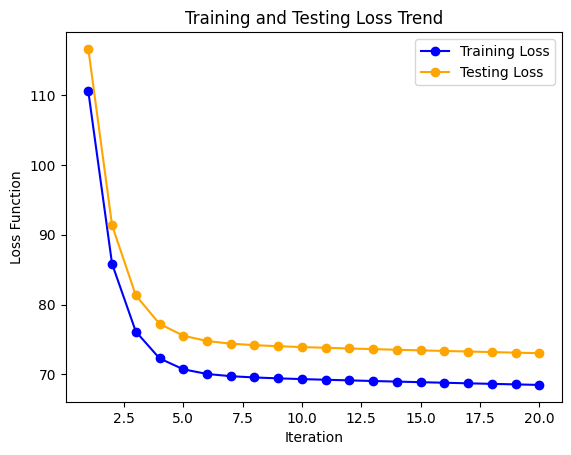

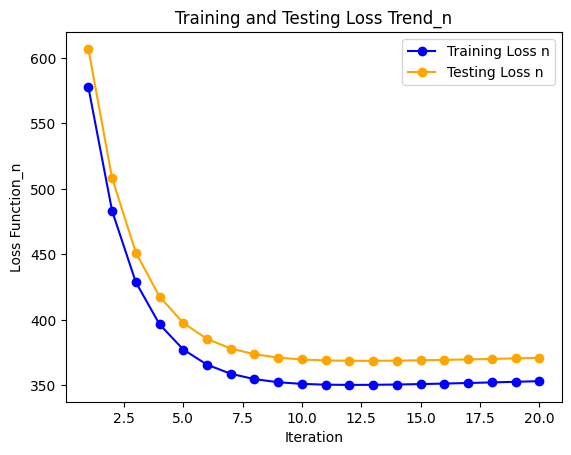

In [114]:
gradient_descent(b=10, a1=10, a2=10, a4=10, a5=10, a7=10, iteration=20, learning_rate=0.1)

#Normalization doesn't have effect on convergence and as you see, it slope are the same. But It made the quantity of the numbers bigger